---

# <center> ★ AI / ML Project - Sistema recomendador para tienda de productos perecederos ★
#### <center> ***Dominio: Retail***

---

<center> <img src="https://raw.githubusercontent.com/Masterx-AI/Project_InstaCart_Market_Basket_Analysis/main/ogr.jpg" style="width: 500px;"/>

---

### Description:

Whether you shop from meticulously planned grocery lists or let whimsy guide your grazing, our unique food rituals define who we are. Instacart, a grocery ordering and delivery app, aims to make it easy to fill your refrigerator and pantry with your personal favorites and staples when you need them. After selecting products through the Instacart app, personal shoppers review your order and do the in-store shopping and delivery for you.

Instacart’s data science team plays a big part in providing this delightful shopping experience. Currently they use transactional data to develop models that predict which products a user will buy again, try for the first time, or add to their cart next during a session. Recently, Instacart open sourced this data - see their blog post on 3 Million Instacart Orders, Open Sourced.

In this competition, Instacart is challenging the Kaggle community to use this anonymized data on customer orders over time to predict which previously purchased products will be in a user’s next order. They’re not only looking for the best model, Instacart’s also looking for machine learning engineers to grow their team.


### Fuente de datos:
Este conjunto de datos es prestado por Mayra.

### Objetivo:
- Comprender el conjunto de datos y limpiarlo.
- Desarrollar un modelo de clasificación para recomendar productos en función de la experiencia pasada de otros clientes.

---

## <center> Plan estratégico de acción:

**Pretendemos resolver el planteamiento del problema mediante la creación de un plan de acción, He aquí algunos de los pasos necesarios:**
1. Exploración de datos
2. Análisis exploratorio de datos (AED)
3. Preprocesamiento de datos
4. Manipulación de datos
5. Modelización predictiva
6. Resultados del proyecto y conclusión

---

## <center>1. Exploración de datos

In [76]:
#Importing the basic librarires

import os
import math
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
from scipy.stats import randint
from scipy.stats import loguniform
from IPython.display import display

from scipy.sparse import csr_matrix
# from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.neighbors import NearestNeighbors

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, \
f1_score, roc_auc_score, roc_curve, precision_score, recall_score

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings 
warnings.filterwarnings('ignore')

In [77]:
# importar el dataset
df = pd.read_excel('C:\\Users\\Lenovo\\Desktop\\Predicción de ventas\\rawdata\\Reporte Maestro LaPeninsula 24.xlsx', sheet_name='Raw Data')
display(df.head())
print('\n\033[1mInferencia:\033[0m El conjunto de datos contiene {} características y {} muestras.'.format(df.shape[1], df.shape[0]))
df1=df.copy()

,AÑO,Semana,Dia,Mes,Fecha,Número,TPV,Tarifa,Fecha Creación,Tipo Doc.,...,Dto. %,Dto. €,Cód. Promoción,Cód. Descuento,Impuesto %,Recargo %,Base,Total,Dto. € Ticket,Dto. % Ticket
0,2022,50,Monday,December,2022-12-12,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.5,NaN,NaN
1,2022,50,Friday,December,2022-12-16,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.6,NaN,NaN
2,2022,50,Friday,December,2022-12-16,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.9,NaN,NaN
3,2022,50,Friday,December,2022-12-16,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN
4,2022,50,Friday,December,2022-12-16,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN



Inferencia: El conjunto de datos contiene 37 características y 79667 muestras.


In [78]:
#comprobar el tipo de datos de cada columna
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79667 entries, 0 to 79666
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   AÑO              79667 non-null  int64         
 1   Semana           79667 non-null  int64         
 2   Dia              79667 non-null  object        
 3   Mes              79667 non-null  object        
 4   Fecha            79667 non-null  datetime64[ns]
 5   Número           37767 non-null  object        
 6   TPV              37767 non-null  object        
 7   Tarifa           37767 non-null  object        
 8   Fecha Creación   37767 non-null  datetime64[ns]
 9   Tipo Doc.        37767 non-null  object        
 10  Cliente          44 non-null     object        
 11  País             43 non-null     object        
 12  CIF/NIF          32 non-null     object        
 13  Cuenta Contable  0 non-null      float64       
 14  Dirección        29 non-null     objec

In [79]:
# comprobar el número de valores únicos en cada columna
print(df.nunique().sort_values())

Color                  0
Cuenta Contable        0
Cód. Descuento         0
Cód. Promoción         0
Talla                  0
Dto. € Ticket          1
País                   1
Tarifa                 1
Grupo Mayor            2
Provincia              2
TPV                    2
Población              3
Tipo Doc.              3
AÑO                    3
Dto. €                 4
Impuesto %             5
Recargo %              5
Dto. % Ticket          5
Dto. %                 6
Código Postal          6
Dirección              9
CIF/NIF                9
Cliente               11
Usuario               12
Mes                   14
Dia                   14
Familia               19
Semana                50
Precio               130
Producto             262
Precio Coste         283
Cantidad             416
Fecha                488
Base                1024
Total               1552
Fecha Creación     20210
Número             20866
dtype: int64


In [80]:
#Comprobar el estadístico descriptivo de las variables numéricas
display(df1.describe())

,AÑO,Semana,Cuenta Contable,Código Postal,Talla,Color,Cantidad,Precio Coste,Precio,Dto. %,Dto. €,Cód. Promoción,Cód. Descuento,Impuesto %,Recargo %,Base,Total,Dto. € Ticket,Dto. % Ticket
count,79667.000000,79667.000000,0.0,19.000000,0.0,0.0,79667.000000,37767.000000,79667.000000,37767.000000,37767.000000,0.0,0.0,37767.000000,37767.000000,37767.000000,79667.000000,37767.0,37767.000000
mean,2023.160593,23.789311,NaN,28676.157895,NaN,NaN,1.085903,3.949161,8.462759,0.224535,0.000781,NaN,NaN,11.083962,1.871310,6.219735,5.649275,0.0,0.286758
std,0.466531,15.696630,NaN,2790.471730,NaN,NaN,0.966804,7.589199,18.181103,4.658820,0.089197,NaN,NaN,4.527990,1.383087,13.227330,11.016847,0.0,4.474132
min,2022.000000,1.000000,NaN,28001.000000,NaN,NaN,-4.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,-59.730000,-65.700000,0.0,0.000000
25%,2023.000000,11.000000,NaN,28009.000000,NaN,NaN,1.000000,0.780000,1.500000,0.000000,0.000000,NaN,NaN,10.000000,1.400000,1.650000,2.000000,0.0,0.000000
50%,2023.000000,20.000000,NaN,28009.000000,NaN,NaN,1.000000,1.750000,4.900000,0.000000,0.000000,NaN,NaN,10.000000,1.400000,4.500000,4.900000,0.0,0.000000
75%,2023.000000,38.000000,NaN,28034.000000,NaN,NaN,1.000000,3.000000,5.900000,0.000000,0.000000,NaN,NaN,10.000000,1.400000,7.360000,5.900000,0.0,0.000000
max,2024.000000,52.000000,NaN,40196.000000,NaN,NaN,150.000000,57.230000,210.000000,100.000000,12.010000,NaN,NaN,21.000000,5.200000,918.640000,1010.500000,0.0,100.000000


**Inferencia:** Las estadísticas parecen estar bien, permítenos ganar más comprensión del conjunto de datos mediante visualizaciones.

---

## <center> 2.  Análisis exploratorio de datos (AED)

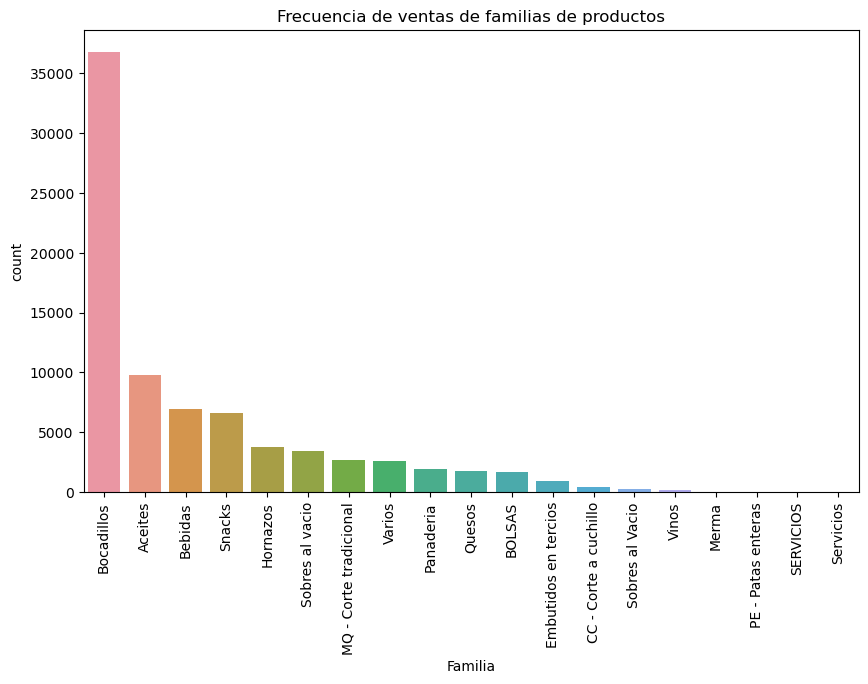

In [81]:
# Distribución de la Familia de productos
sns.countplot(df.Familia, order=df.Familia.value_counts().index)
plt.title('Frecuencia de ventas de familias de productos')
plt.xticks(rotation=90)
# mostrar el gráfico completo
plt.savefig('C:\\Users\\Lenovo\\Desktop\\Predicción de ventas\\images\\Frecuencia de ventas de familias de productos.png', bbox_inches='tight')
plt.show()

**Inferencia:** La mayoría de ventas proceden de bocadillos, aceites y bebidas

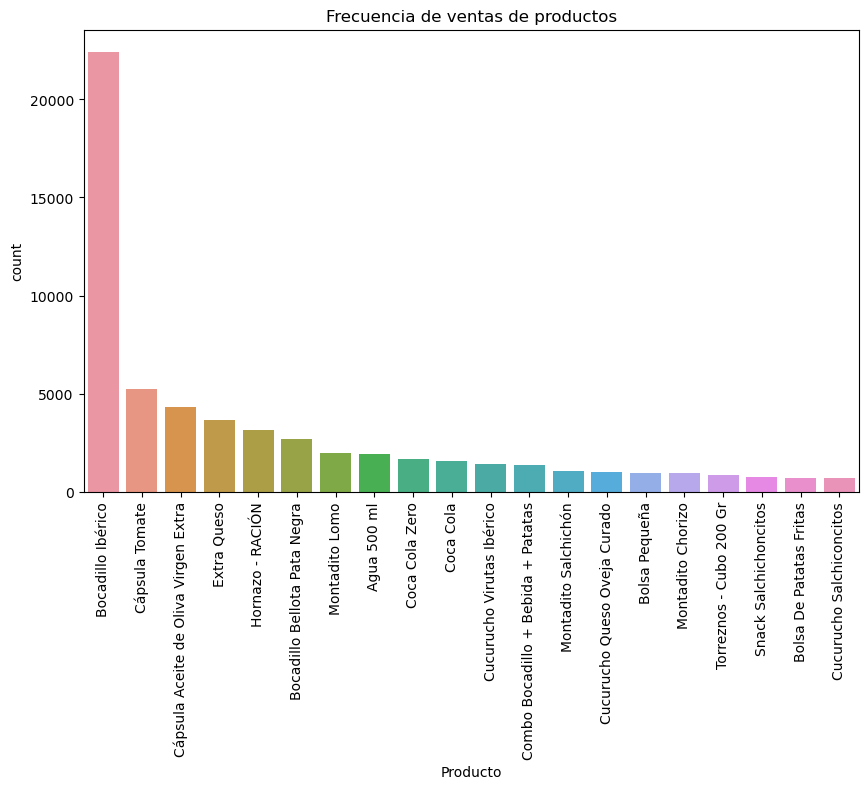

In [7]:
#Distribución de los productos
sns.countplot(df.Producto, order=df.Producto.value_counts().index[:20])
plt.title('Frecuencia de ventas de productos')
plt.xticks(rotation=90)
plt.savefig('C:\\Users\\Lenovo\\Desktop\\Predicción de ventas\\images\\Frecuencia de ventas de productos.png', bbox_inches='tight')
plt.show()

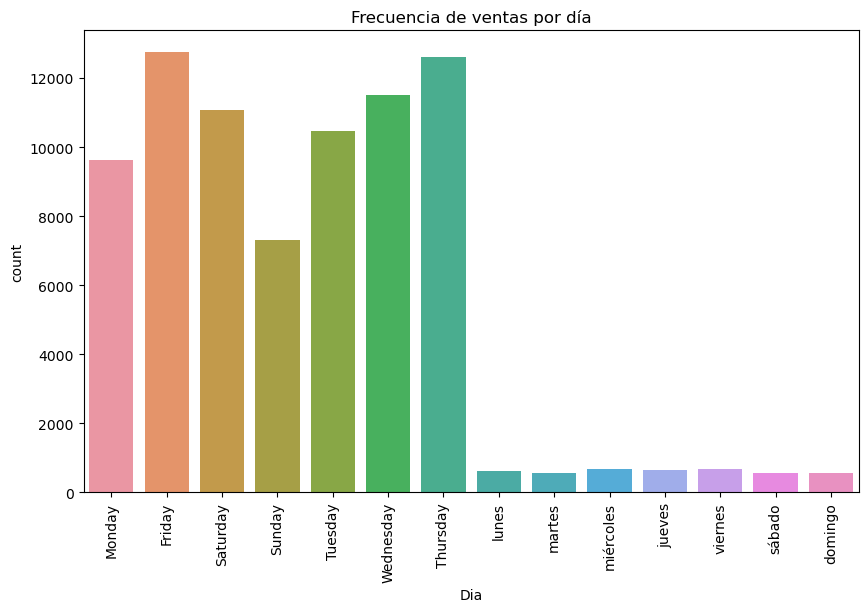

In [8]:
#Distribución de la ventas por día
sns.countplot(df.Dia)#, order=df.aisle.value_counts().index[:20])
plt.title('Frecuencia de ventas por día')
plt.xticks(rotation=90)
# size
plt.rcParams['figure.figsize'] = [10,6]
plt.savefig('C:\\Users\\Lenovo\\Desktop\\Predicción de ventas\\images\\Frecuencia de ventas por día.png', bbox_inches='tight')
plt.show()

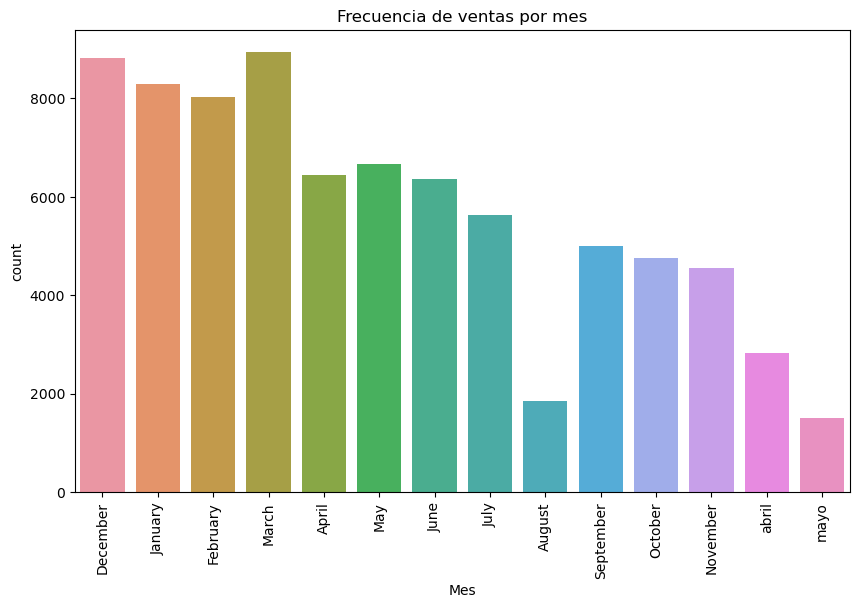

In [9]:
#Distribución de la ventas por mes
sns.countplot(df.Mes)
plt.title('Frecuencia de ventas por mes')
plt.xticks(rotation=90)
plt.savefig('C:\\Users\\Lenovo\\Desktop\\Predicción de ventas\\images\\Frecuencia de ventas por mes.png', bbox_inches='tight')
plt.show()

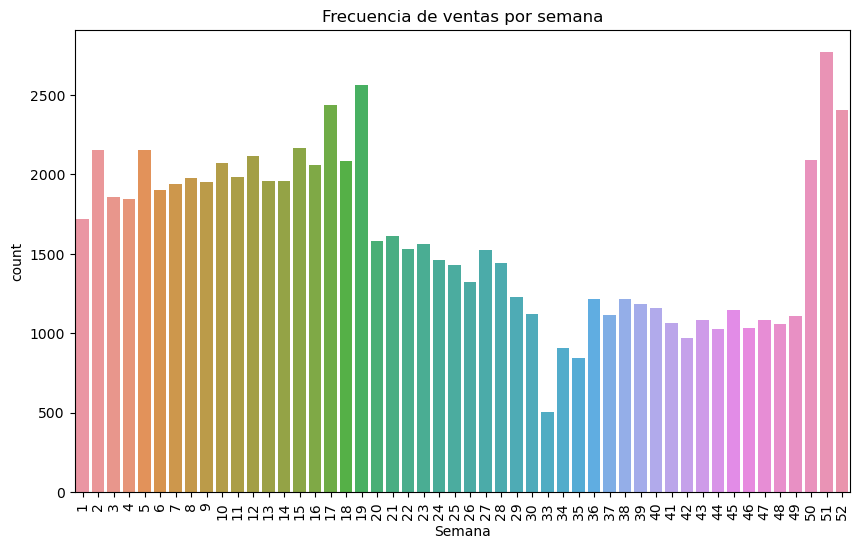

In [10]:
#Distribución de la ventas por semana
sns.countplot(df.Semana)
plt.title('Frecuencia de ventas por semana')
plt.xticks(rotation=90)
plt.savefig('C:\\Users\\Lenovo\\Desktop\\Predicción de ventas\\images\\Frecuencia de ventas por semana.png', bbox_inches='tight')
plt.show()

---

## <center> 3. Preprocesamiento de datos

In [11]:
#Comprueban los valores únicos de las columnas
print(df.isnull().sum())
print('\n\033[1mInferencia:\033[0m El conjunto de datos tiene muchos elementos nulos')

AÑO                    0
Semana                 0
Dia                    0
Mes                    0
Fecha                  0
Número             41900
TPV                41900
Tarifa             41900
Fecha Creación     41900
Tipo Doc.          41900
Cliente            79623
País               79624
CIF/NIF            79635
Cuenta Contable    79667
Dirección          79638
Población          79648
Provincia          79651
Código Postal      79648
Usuario            41899
Grupo Mayor        69798
Familia                0
Producto               0
Talla              79667
Color              79667
Cantidad               0
Precio Coste       41900
Precio                 0
Dto. %             41900
Dto. €             41900
Cód. Promoción     79667
Cód. Descuento     79667
Impuesto %         41900
Recargo %          41900
Base               41900
Total                  0
Dto. € Ticket      41900
Dto. % Ticket      41900
dtype: int64

Inferencia: El conjunto de datos tiene muchos elementos nulos

In [12]:
def modificar_dataset(dataset, seed):
    ''' 
    la función modificar_dataset toma un conjunto de datos y realiza las siguientes operaciones:
    - Reemplazar los valores de la columna Familia mediante replace
    - Reemplazar los valores de la columna Dia mediante replace
    - Reemplazar los valores de la columna Mes mediante replace
    - Eliminar columnas con más del 79600 valores nulos
    - Eliminar filas con valores nulos
    - Crear una nueva columna con la hora de la compra a partir de la columna Fecha Creación
    - Sustituir valores en la columna Dia con replace para convertirlos en números
    - Crear una columna llamada days_since_prior_order que indica el número de días desde la última compra de un producto en función de la columna Fecha
    - Crear columna llamada client_id que indica el id del cliente en función de la columna Número de forma ascendentemente empezando desde 0
    - Crear columna llamada product_id que indica el id del producto en función de la columna Producto de forma ascendentemente empezando desde 0
    - Crear columna llamada user_id en función de la columna order_id de forma aleatoria
    parámetros: 
    - dataset: conjunto de datos
    retorna:
    - dataset: conjunto de datos modificado
    '''
    # se remplazan los valores de la columna Familia mediante replace
    dataset['Familia'] = dataset['Familia'].replace({'BOLSAS': 'Bolsas', 'Sobres al Vacio': 'Sobres al vacio', 'SERVICIOS': 'Servicios'})
    # se reemplazan los valores de la columna Dia mediante replace
    dataset['Dia'] = dataset['Dia'].replace({'Monday': 'lunes', 'Friday': 'viernes', 'Saturday': 'sábado', 'Sunday': 'domingo', 'Thursday': 'jueves', 'Tuesday': 'martes', 'Wednesday': 'miércoles'})
    # se reemplazan los valores de la columna Mes mediante replace
    dataset['Mes'] = dataset['Mes'].replace({'December': 'diciembre', 'November': 'noviembre', 'October': 'octubre', 'September': 'septiembre', 'August': 'agosto', 'July': 'julio', 'June': 'junio', 'May': 'mayo', 'April': 'abril', 'March': 'marzo', 'February': 'febrero', 'January': 'enero'})
    # Eliminar columnas con más del 79600 valores nulos
    dataset = dataset.drop(['Color', 'Cuenta Contable', 'Cód. Descuento', 'Cód. Promoción', 'Talla', 'Cliente', 'País', 'CIF/NIF', 'Dirección', 'Población', 'Provincia', 'Código Postal', 'Usuario', 'Grupo Mayor'], axis=1)
    # crear una nueva columna con la hora de la compra a partir de la columna Fecha Creación
    dataset['Hora'] = dataset['Fecha Creación'].apply(lambda x: x.hour)
    # sustituir valores nulos en la columna Hora por 0
    dataset['Hora'] = dataset['Hora'].fillna(0)
    # cambiar tipo de columna Hora a entero
    dataset['Hora'] = dataset['Hora'].astype(int)
    # sustituir valores en la columna Dia con replace para convertirlos en números
    dataset['Dia'] = dataset['Dia'].replace({'lunes': 1, 'martes': 2, 'miércoles': 3, 'jueves': 4, 'viernes': 5, 'sábado': 6, 'domingo': 7})
    # crear una columna llamada days_since_prior_order que indica el número de días desde la última compra de un producto en funcion de la columna Fecha
    dataset['days_since_prior_order'] = dataset.groupby('Producto')['Fecha'].diff().dt.days
    dataset['days_since_prior_order'].fillna(0, inplace=True)
    dataset['days_since_prior_order'] = dataset['days_since_prior_order'].astype(int)
    # crear columna llamada client_id que indica el id del cliente en función de la columna Número de forma ascendentemente empezando desde 0
    dataset['order_id'] = dataset['Número'].astype('category').cat.codes
    dataset['order_id'] = dataset['order_id'].astype(int)
    # crear columna llamada product_id que indica el id del producto en función de la columna Producto de forma ascendentemente empezando desde 0
    dataset['product_id'] = dataset['Producto'].astype('category').cat.codes
    dataset['product_id'] = dataset['product_id'].astype(int)
    # crear columna llamada user_id en función de la columna order_id de forma aleatoria
    np.random.seed(seed)
    dataset['user_id'] = dataset.groupby('order_id')['order_id'].transform(lambda x: np.random.randint(0, 1000))
    dataset['user_id'] = dataset['user_id'].astype(int)
    # eliminar filas con valores nulos
    dataset = dataset.dropna(axis=0)
    dataset = dataset.drop_duplicates()
    return dataset


In [13]:
df1 = df.copy()
df1 = modificar_dataset(df1, 42)
display(df1.head())

,AÑO,Semana,Dia,Mes,Fecha,Número,TPV,Tarifa,Fecha Creación,Tipo Doc.,...,Recargo %,Base,Total,Dto. € Ticket,Dto. % Ticket,Hora,days_since_prior_order,order_id,product_id,user_id
41900,2023,33,2,agosto,2023-08-15,T/000003,SERVIDOR,General,2023-08-15 11:00:00,Fra. Simp.,...,1.4,4.45,4.9,0.0,0.0,11,16,8,44,121
41901,2023,33,2,agosto,2023-08-15,T/000004,SERVIDOR,General,2023-08-15 12:02:00,Fra. Simp.,...,1.4,9.00,9.9,0.0,0.0,12,16,9,39,466
41902,2023,33,2,agosto,2023-08-15,T/000004,SERVIDOR,General,2023-08-15 12:02:00,Fra. Simp.,...,1.4,1.36,1.5,0.0,0.0,12,17,9,48,466
41903,2023,33,2,agosto,2023-08-15,T/000005,SERVIDOR,General,2023-08-15 12:08:00,Fra. Simp.,...,1.4,8.91,9.8,0.0,0.0,12,16,10,43,214
41904,2023,33,2,agosto,2023-08-15,T/000006,SERVIDOR,General,2023-08-15 12:33:00,Fra. Simp.,...,1.4,4.45,4.9,0.0,0.0,12,0,11,43,330


In [14]:
print('\n\033[1mInferencia:\033[0m El conjunto de datos no tiene elementos nulos')


Inferencia: El conjunto de datos no tiene elementos nulos


In [15]:
print('\n\033[1mInferencia:\033[0m El conjunto de datos no tiene duplicados')   


Inferencia: El conjunto de datos no tiene duplicados


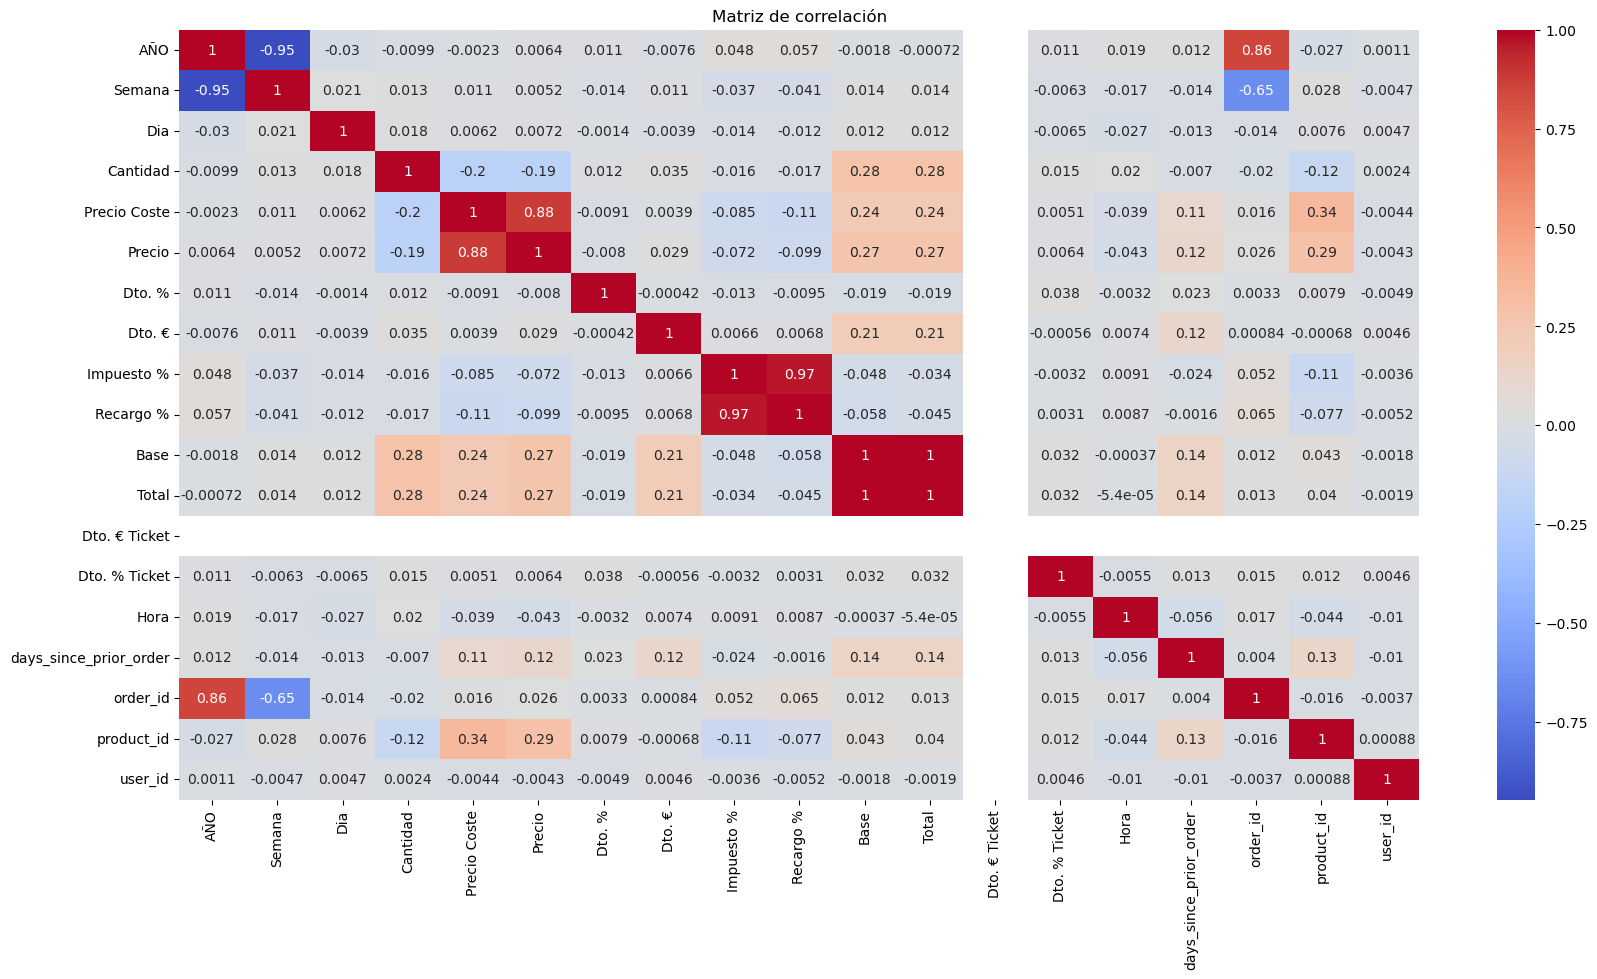

In [16]:
# crear matriz de correlación con seaborn
plt.figure(figsize=(20, 10))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.savefig('C:\\Users\\Lenovo\\Desktop\\Predicción de ventas\\images\\Matriz de correlación conjunto datos preprocesado.png', bbox_inches='tight')
plt.show()

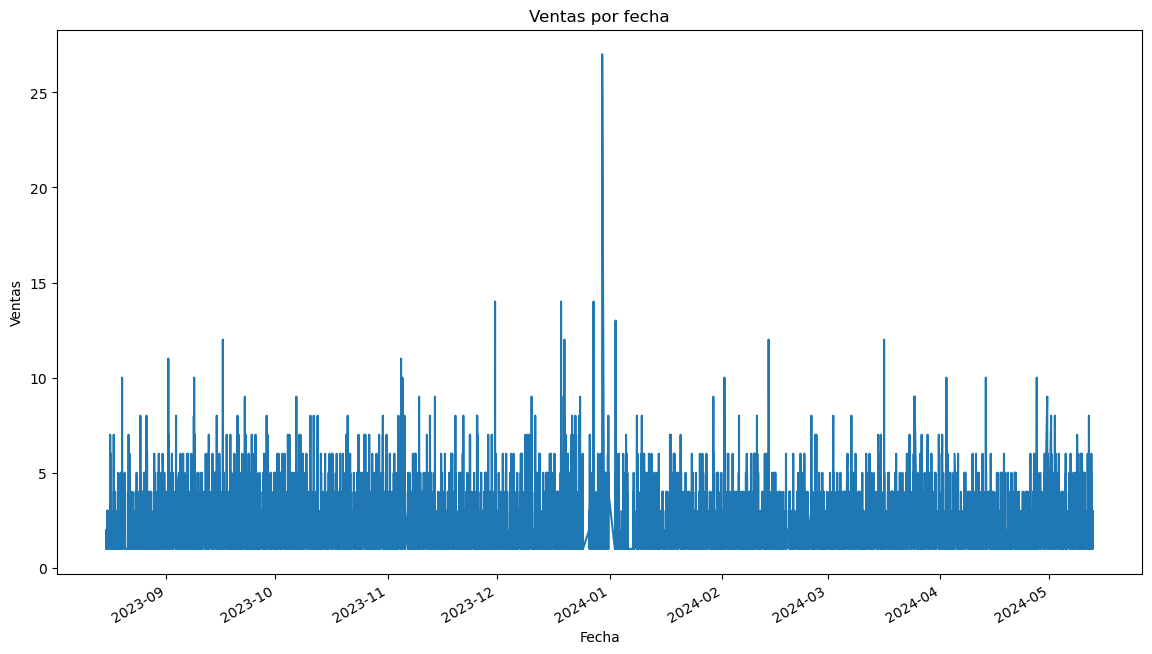

In [17]:
# crear gráfico de series temporales
plt.figure(figsize=(14, 8))
df1['Fecha Creación'].value_counts().sort_index().plot()
plt.title('Ventas por fecha')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.savefig('C:\\Users\\Lenovo\\Desktop\\Predicción de ventas\\images\\Ventas por fecha.png', bbox_inches='tight')
plt.show()

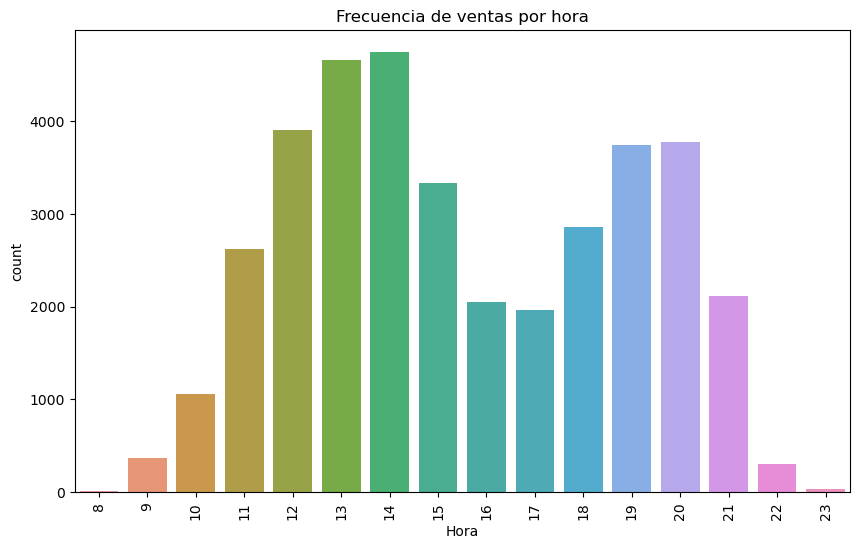

In [18]:
# Distribución de la venta por horas
sns.countplot(df1['Hora'])
plt.title('Frecuencia de ventas por hora')
plt.xticks(rotation=90)
plt.savefig('C:\\Users\\Lenovo\\Desktop\\Predicción de ventas\\images\\Frecuencia de ventas por hora.png', bbox_inches='tight')
plt.show()

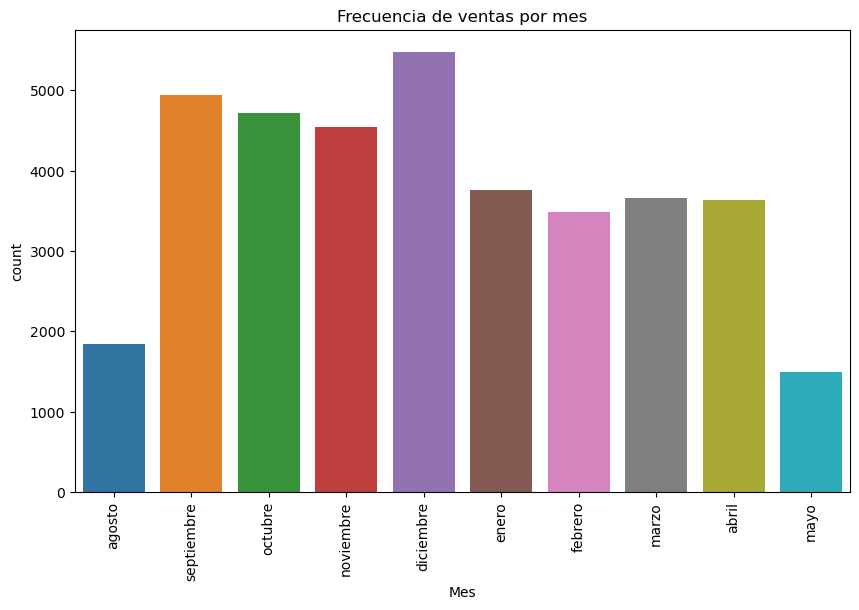

In [19]:
# Distribución de la venta por mes
sns.countplot(df1['Mes'])
plt.title('Frecuencia de ventas por mes')
plt.xticks(rotation=90)
plt.savefig('C:\\Users\\Lenovo\\Desktop\\Predicción de ventas\\images\\Frecuencia de ventas por mes preprocesado.png', bbox_inches='tight')
plt.show()

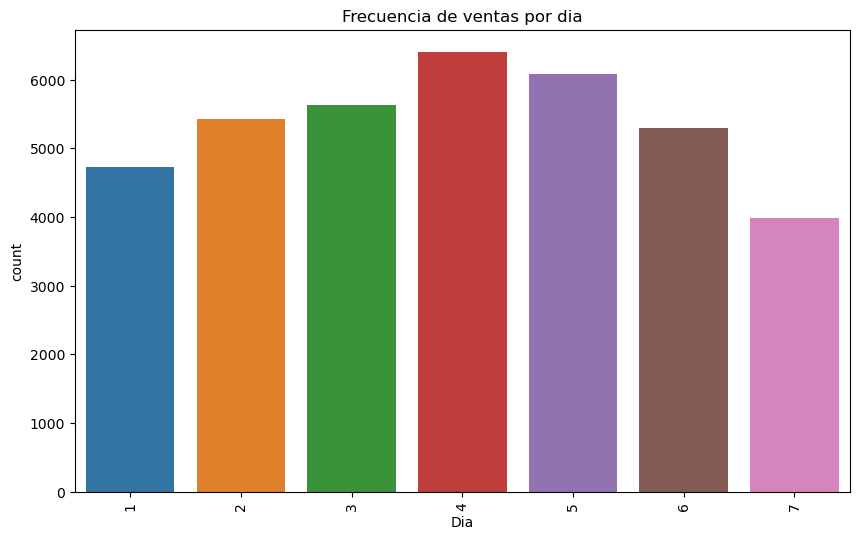

In [20]:
# Distribución de la venta por dia
sns.countplot(df1['Dia'])
plt.title('Frecuencia de ventas por dia')
plt.xticks(rotation=90)
plt.savefig('C:\\Users\\Lenovo\\Desktop\\Predicción de ventas\\images\\Frecuencia de ventas por dia preprocesado.png', bbox_inches='tight')
plt.show()

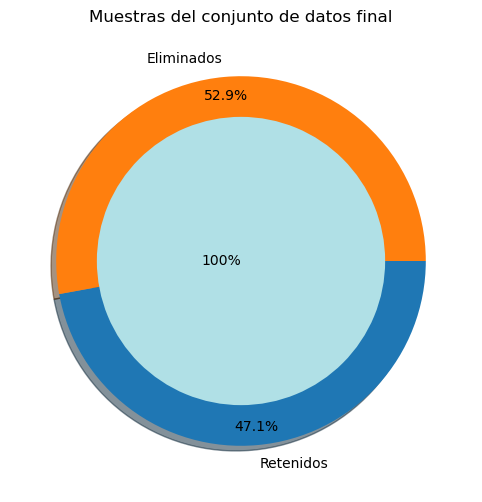


Inferencia:El conjunto de datos final después de su limpieza tiene 37551 columnas y 28 filas.


In [21]:
# Tamaño final del dataset después de realizar el preprocesamiento
plt.title('Muestras del conjunto de datos final')
plt.pie([df1.shape[0], df.shape[0]-df1.shape[0]], radius = 1, shadow=True,labels=['Retenidos','Eliminados'], counterclock=False, autopct='%1.1f%%', pctdistance=0.9, explode=[0,0])
plt.pie([df.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78, shadow=True, colors=['powderblue'])
plt.savefig('C:\\Users\\Lenovo\\Desktop\\Predicción de ventas\\images\\Muestras del conjunto de datos preprocesado.png', bbox_inches='tight')
plt.show()
print('\n\033[1mInferencia:\033[0mEl conjunto de datos final después de su limpieza tiene {} columnas y {} filas.'.format(df1.shape[0], df1.shape[1]))

In [22]:
dummies_df = pd.get_dummies(data=df1, prefix=['Day','Hour'], columns=['Dia','Hora'], drop_first=False)
dummies_df.head()

,AÑO,Semana,Mes,Fecha,Número,TPV,Tarifa,Fecha Creación,Tipo Doc.,Familia,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
41900,2023,33,agosto,2023-08-15,T/000003,SERVIDOR,General,2023-08-15 11:00:00,Fra. Simp.,Bocadillos,...,0,0,0,0,0,0,0,0,0,0
41901,2023,33,agosto,2023-08-15,T/000004,SERVIDOR,General,2023-08-15 12:02:00,Fra. Simp.,Bocadillos,...,0,0,0,0,0,0,0,0,0,0
41902,2023,33,agosto,2023-08-15,T/000004,SERVIDOR,General,2023-08-15 12:02:00,Fra. Simp.,Snacks,...,0,0,0,0,0,0,0,0,0,0
41903,2023,33,agosto,2023-08-15,T/000005,SERVIDOR,General,2023-08-15 12:08:00,Fra. Simp.,Bocadillos,...,0,0,0,0,0,0,0,0,0,0
41904,2023,33,agosto,2023-08-15,T/000006,SERVIDOR,General,2023-08-15 12:33:00,Fra. Simp.,Bocadillos,...,0,0,0,0,0,0,0,0,0,0


---

## <center> 4. Transformación de datos

In [23]:
user_prod_df = dummies_df.groupby(['user_id','product_id']).agg({'order_id':'nunique',
                                                                 'days_since_prior_order':'mean',
                                                                 'Day_1':'sum',
                                                                 'Day_2':'sum',
                                                                 'Day_3':'sum',
                                                                 'Day_4':'sum',
                                                                 'Day_5':'sum',
                                                                 'Day_6':'sum',
                                                                 'Day_7':'sum',
                                                                 'Hour_8':'sum',
                                                                 'Hour_9':'sum',
                                                                 'Hour_10':'sum',
                                                                 'Hour_11':'sum',
                                                                 'Hour_12':'sum',
                                                                 'Hour_13':'sum',
                                                                 'Hour_14':'sum',
                                                                 'Hour_15':'sum',
                                                                 'Hour_16':'sum',
                                                                 'Hour_17':'sum',
                                                                 'Hour_18':'sum',
                                                                 'Hour_19':'sum',
                                                                 'Hour_20':'sum',
                                                                 'Hour_21':'sum',
                                                                 'Hour_22':'sum',
                                                                 'Hour_23':'sum'
                                                                }).reset_index()
user_prod_df.head()

,user_id,product_id,order_id,days_since_prior_order,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,0,43,9,0.111111,1,1,0,2,3,2,...,0,3,0,0,0,0,1,2,0,0
1,0,46,1,1.000000,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,0,48,1,1.000000,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,0,81,2,0.500000,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,85,1,0.000000,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [24]:
user_purchase_df = dummies_df.groupby(['user_id']).agg({         'order_id':'nunique',
                                                                 'product_id': 'nunique',
                                                                 'days_since_prior_order':'mean',
                                                                 'Day_1':'sum',
                                                                 'Day_2':'sum',
                                                                 'Day_3':'sum',
                                                                 'Day_4':'sum',
                                                                 'Day_5':'sum',
                                                                 'Day_6':'sum',
                                                                 'Day_7':'sum',
                                                                 'Hour_8':'sum',
                                                                 'Hour_9':'sum',
                                                                 'Hour_10':'sum',
                                                                 'Hour_11':'sum',
                                                                 'Hour_12':'sum',
                                                                 'Hour_13':'sum',
                                                                 'Hour_14':'sum',
                                                                 'Hour_15':'sum',
                                                                 'Hour_16':'sum',
                                                                 'Hour_17':'sum',
                                                                 'Hour_18':'sum',
                                                                 'Hour_19':'sum',
                                                                 'Hour_20':'sum',
                                                                 'Hour_21':'sum',
                                                                 'Hour_22':'sum',
                                                                 'Hour_23':'sum'
                                                                }).reset_index()
user_purchase_df.head()

,user_id,order_id,product_id,days_since_prior_order,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,0,25,19,0.512195,5,3,8,7,12,6,...,2,11,1,0,1,4,3,4,1,0
1,1,17,14,0.500000,3,6,9,4,2,0,...,4,2,3,0,1,0,5,0,0,0
2,2,21,23,1.204545,10,9,4,10,5,5,...,3,8,1,8,3,0,0,3,0,1
3,3,14,15,0.727273,1,4,3,8,2,0,...,1,3,2,0,0,3,9,0,0,0
4,4,15,17,0.444444,5,0,3,8,7,0,...,0,1,0,1,3,5,4,4,0,0


In [25]:
product_purchase_df = dummies_df.groupby(['product_id']).agg({   'order_id':'nunique',
                                                                 'user_id': 'nunique',
                                                                 'days_since_prior_order':'mean',
                                                                 'Day_1':'sum',
                                                                 'Day_2':'sum',
                                                                 'Day_3':'sum',
                                                                 'Day_4':'sum',
                                                                 'Day_5':'sum',
                                                                 'Day_6':'sum',
                                                                 'Day_7':'sum',
                                                                 'Hour_8':'sum',
                                                                 'Hour_9':'sum',
                                                                 'Hour_10':'sum',
                                                                 'Hour_11':'sum',
                                                                 'Hour_12':'sum',
                                                                 'Hour_13':'sum',
                                                                 'Hour_14':'sum',
                                                                 'Hour_15':'sum',
                                                                 'Hour_16':'sum',
                                                                 'Hour_17':'sum',
                                                                 'Hour_18':'sum',
                                                                 'Hour_19':'sum',
                                                                 'Hour_20':'sum',
                                                                 'Hour_21':'sum',
                                                                 'Hour_22':'sum',
                                                                 'Hour_23':'sum'
                                                                }).reset_index()
product_purchase_df.head()

,product_id,order_id,user_id,days_since_prior_order,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,28,45,43,1.777778,11.0,5.0,5.0,6.0,4.0,11.0,...,2.0,1.0,1.0,1.0,3.0,6.0,3.0,1.0,0,0
1,29,12,12,5.666667,2.0,4.0,1.0,0.0,1.0,2.0,...,4.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0,0
2,30,2,2,4.500000,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,31,103,95,1.673077,12.0,18.0,15.0,19.0,13.0,18.0,...,14.0,5.0,4.0,7.0,12.0,11.0,8.0,4.0,4,0
4,32,19,19,0.210526,0.0,0.0,1.0,6.0,4.0,5.0,...,3.0,4.0,1.0,0.0,0.0,1.0,0.0,2.0,2,0


In [26]:
# cambiar los tipos de datos de todas las columnas a int16 salvo la columna days_since_prior_order
product_purchase_df[product_purchase_df.columns[4:]] = product_purchase_df[product_purchase_df.columns[4:]].astype(int)
product_purchase_df.head()

,product_id,order_id,user_id,days_since_prior_order,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,28,45,43,1.777778,11,5,5,6,4,11,...,2,1,1,1,3,6,3,1,0,0
1,29,12,12,5.666667,2,4,1,0,1,2,...,4,1,1,0,1,0,1,0,0,0
2,30,2,2,4.500000,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,31,103,95,1.673077,12,18,15,19,13,18,...,14,5,4,7,12,11,8,4,4,0
4,32,19,19,0.210526,0,0,1,6,4,5,...,3,4,1,0,0,1,0,2,2,0


In [27]:
temp = pd.merge(left=user_prod_df,  right=user_purchase_df, on='user_id', suffixes=('','_user'))
temp.head(10)

,user_id,product_id,order_id,days_since_prior_order,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,...,Hour_14_user,Hour_15_user,Hour_16_user,Hour_17_user,Hour_18_user,Hour_19_user,Hour_20_user,Hour_21_user,Hour_22_user,Hour_23_user
0,0,43,9,0.111111,1,1,0,2,3,2,...,2,11,1,0,1,4,3,4,1,0
1,0,46,1,1.000000,0,0,0,0,1,0,...,2,11,1,0,1,4,3,4,1,0
2,0,48,1,1.000000,0,0,0,0,1,0,...,2,11,1,0,1,4,3,4,1,0
3,0,81,2,0.500000,0,0,1,0,0,1,...,2,11,1,0,1,4,3,4,1,0
4,0,85,1,0.000000,0,1,0,0,0,0,...,2,11,1,0,1,4,3,4,1,0
5,0,86,3,0.000000,1,0,0,0,1,1,...,2,11,1,0,1,4,3,4,1,0
6,0,92,1,0.000000,0,0,1,0,0,0,...,2,11,1,0,1,4,3,4,1,0
7,0,94,1,0.000000,0,0,1,0,0,0,...,2,11,1,0,1,4,3,4,1,0
8,0,95,2,0.000000,1,0,0,0,1,0,...,2,11,1,0,1,4,3,4,1,0
9,0,96,4,0.000000,2,0,0,0,1,1,...,2,11,1,0,1,4,3,4,1,0


In [28]:
# cambiar los tipos de datos de todas las columnas a int16 salvo la columna days_since_prior_order
temp[temp.columns[4:]] = temp[temp.columns[4:]].astype(int)
temp.head()

,user_id,product_id,order_id,days_since_prior_order,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,...,Hour_14_user,Hour_15_user,Hour_16_user,Hour_17_user,Hour_18_user,Hour_19_user,Hour_20_user,Hour_21_user,Hour_22_user,Hour_23_user
0,0,43,9,0.111111,1,1,0,2,3,2,...,2,11,1,0,1,4,3,4,1,0
1,0,46,1,1.000000,0,0,0,0,1,0,...,2,11,1,0,1,4,3,4,1,0
2,0,48,1,1.000000,0,0,0,0,1,0,...,2,11,1,0,1,4,3,4,1,0
3,0,81,2,0.500000,0,0,1,0,0,1,...,2,11,1,0,1,4,3,4,1,0
4,0,85,1,0.000000,0,1,0,0,0,0,...,2,11,1,0,1,4,3,4,1,0


In [29]:
features_df = pd.merge(left=temp,  right=product_purchase_df, on='product_id', suffixes=('','_prod'))
features_df.head(10)

,user_id,product_id,order_id,days_since_prior_order,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,...,Hour_14_prod,Hour_15_prod,Hour_16_prod,Hour_17_prod,Hour_18_prod,Hour_19_prod,Hour_20_prod,Hour_21_prod,Hour_22_prod,Hour_23_prod
0,0,43,9,0.111111,1,1,0,2,3,2,...,1310,895,621,555,784,1043,1140,640,80,9
1,1,43,8,0.000000,2,3,1,0,1,0,...,1310,895,621,555,784,1043,1140,640,80,9
2,2,43,11,0.000000,3,1,1,3,1,2,...,1310,895,621,555,784,1043,1140,640,80,9
3,3,43,8,0.000000,1,1,1,3,1,0,...,1310,895,621,555,784,1043,1140,640,80,9
4,4,43,9,0.000000,1,0,1,3,3,0,...,1310,895,621,555,784,1043,1140,640,80,9
5,5,43,8,0.000000,1,3,0,1,3,0,...,1310,895,621,555,784,1043,1140,640,80,9
6,6,43,13,0.000000,1,2,4,1,1,2,...,1310,895,621,555,784,1043,1140,640,80,9
7,7,43,12,0.000000,3,2,0,2,1,3,...,1310,895,621,555,784,1043,1140,640,80,9
8,8,43,10,0.000000,0,2,3,2,2,1,...,1310,895,621,555,784,1043,1140,640,80,9
9,9,43,11,0.090909,1,0,3,3,3,0,...,1310,895,621,555,784,1043,1140,640,80,9


In [30]:
# cambiar los tipos de datos de todas las columnas a int16 salvo la columna days_since_prior_order
features_df[features_df.columns[4:]] = features_df[features_df.columns[4:]].astype(int)
features_df.head()

,user_id,product_id,order_id,days_since_prior_order,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,...,Hour_14_prod,Hour_15_prod,Hour_16_prod,Hour_17_prod,Hour_18_prod,Hour_19_prod,Hour_20_prod,Hour_21_prod,Hour_22_prod,Hour_23_prod
0,0,43,9,0.111111,1,1,0,2,3,2,...,1310,895,621,555,784,1043,1140,640,80,9
1,1,43,8,0.000000,2,3,1,0,1,0,...,1310,895,621,555,784,1043,1140,640,80,9
2,2,43,11,0.000000,3,1,1,3,1,2,...,1310,895,621,555,784,1043,1140,640,80,9
3,3,43,8,0.000000,1,1,1,3,1,0,...,1310,895,621,555,784,1043,1140,640,80,9
4,4,43,9,0.000000,1,0,1,3,3,0,...,1310,895,621,555,784,1043,1140,640,80,9


In [31]:
def mi_reset(varnames):
    """
    la función mi_reset toma una lista de nombres de variables y las guarda en un diccionario para luego reiniciar el kernel y cargar las variables guardadas
    parámetros:
    - varnames: lista de nombres de variables
    retorna:
    - variables guardadas
    """
    globals_ = globals()
    to_save = {v: globals_[v] for v in varnames}
    to_save['mi_reset'] = mi_reset  # lets keep this function by default
    del globals_
    get_ipython().magic("reset")
    globals().update(to_save)
    
variables = ['features_df']
mi_reset(variables)

In [32]:
def reduce_mem_usage(df):
    """ 
    la función itera a través de todas las columnas de un conjunto de datos y modifica el tipo de datos
    para reducir el uso de la memoria
    parámetros:
    - df: conjunto de datos
    retorna:
    - df: conjunto de datos con uso de memoria reducido     
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('El uso de la memoria del dataframe es {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        col_type2 = df[col].dtype.name
        
        if ((col_type != object) and (col_type2 != 'category')):
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('El uso de la memoria después de la optimizacion es: {:.2f} MB'.format(end_mem))
    print('Disminuido en un {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [33]:
features_df.dtypes

user_id                     int64
product_id                  int64
order_id                    int64
days_since_prior_order    float64
Day_1                       int32
                           ...   
Hour_19_prod                int32
Hour_20_prod                int32
Hour_21_prod                int32
Hour_22_prod                int32
Hour_23_prod                int32
Length: 79, dtype: object

In [37]:
import numpy as np

reduce_features_df_dummied = reduce_mem_usage(features_df)

El uso de la memoria del dataframe es 2.28 MB
El uso de la memoria después de la optimizacion es: 2.28 MB
Disminuido en un 0.0%


In [38]:
# mostrar el tipo de datos
reduce_features_df_dummied.dtypes


user_id                     int16
product_id                  int16
order_id                     int8
days_since_prior_order    float16
Day_1                        int8
                           ...   
Hour_19_prod                int16
Hour_20_prod                int16
Hour_21_prod                int16
Hour_22_prod                 int8
Hour_23_prod                 int8
Length: 79, dtype: object

In [39]:
# se guarda el conjunto de datos en un archivo csv
reduce_features_df_dummied.to_csv('C:\\Users\\Lenovo\\Desktop\\Predicción de ventas\\processedData\\reduce_features_df_dummied.csv', index=False)

In [40]:
# se muestra el tamaño del conjunto de datos
print('El conjunto de datos tiene {} filas y {} columnas'.format(reduce_features_df_dummied.shape[0], reduce_features_df_dummied.shape[1]))


El conjunto de datos tiene 21352 filas y 79 columnas


In [41]:
reduce_features_df_dummied.isnull().sum().sort_values()

user_id                        0
Day_1_prod                     0
days_since_prior_order_prod    0
user_id_prod                   0
order_id_prod                  0
                              ..
Hour_20                        0
Hour_19                        0
Hour_18                        0
product_id_user                0
Hour_23_prod                   0
Length: 79, dtype: int64

In [42]:
# mostrar el estadístico descriptivo de las variables numéricas
reduce_features_df_dummied.describe()

,user_id,product_id,order_id,days_since_prior_order,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,...,Hour_14_prod,Hour_15_prod,Hour_16_prod,Hour_17_prod,Hour_18_prod,Hour_19_prod,Hour_20_prod,Hour_21_prod,Hour_22_prod,Hour_23_prod
count,21352.000000,21352.000000,21352.000000,2.135200e+04,21352.000000,21352.000000,21352.000000,21352.000000,21352.000000,21352.000000,...,21352.000000,21352.000000,21352.000000,21352.000000,21352.000000,21352.000000,21352.000000,21352.000000,21352.000000,21352.000000
mean,502.104580,120.512973,1.752857,1.439453e+00,0.221384,0.254028,0.263816,0.299972,0.284985,0.247846,...,135.345260,96.312664,61.480564,56.422021,76.873689,101.611043,105.223632,60.123220,7.342919,0.884414
std,288.087752,65.564068,2.056288,inf,0.516439,0.553881,0.564799,0.618349,0.596497,0.541924,...,273.459102,188.671801,130.002866,116.356972,161.557468,215.038027,234.996580,132.977768,16.865531,2.024194
min,0.000000,28.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,254.000000,81.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,15.000000,10.000000,5.000000,6.000000,12.000000,13.000000,14.000000,7.000000,0.000000,0.000000
50%,507.000000,101.000000,1.000000,1.999512e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,43.000000,27.000000,16.000000,15.000000,28.000000,42.000000,41.000000,16.000000,2.000000,0.000000
75%,750.000000,167.000000,2.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,130.000000,90.000000,62.000000,64.000000,88.000000,114.000000,106.000000,63.000000,7.000000,1.000000
max,999.000000,261.000000,21.000000,2.870000e+02,8.000000,8.000000,7.000000,8.000000,7.000000,6.000000,...,1310.000000,895.000000,621.000000,555.000000,784.000000,1043.000000,1140.000000,640.000000,80.000000,9.000000


## Analisis de grupos de clientes y variables más relevantes del dummy dataset

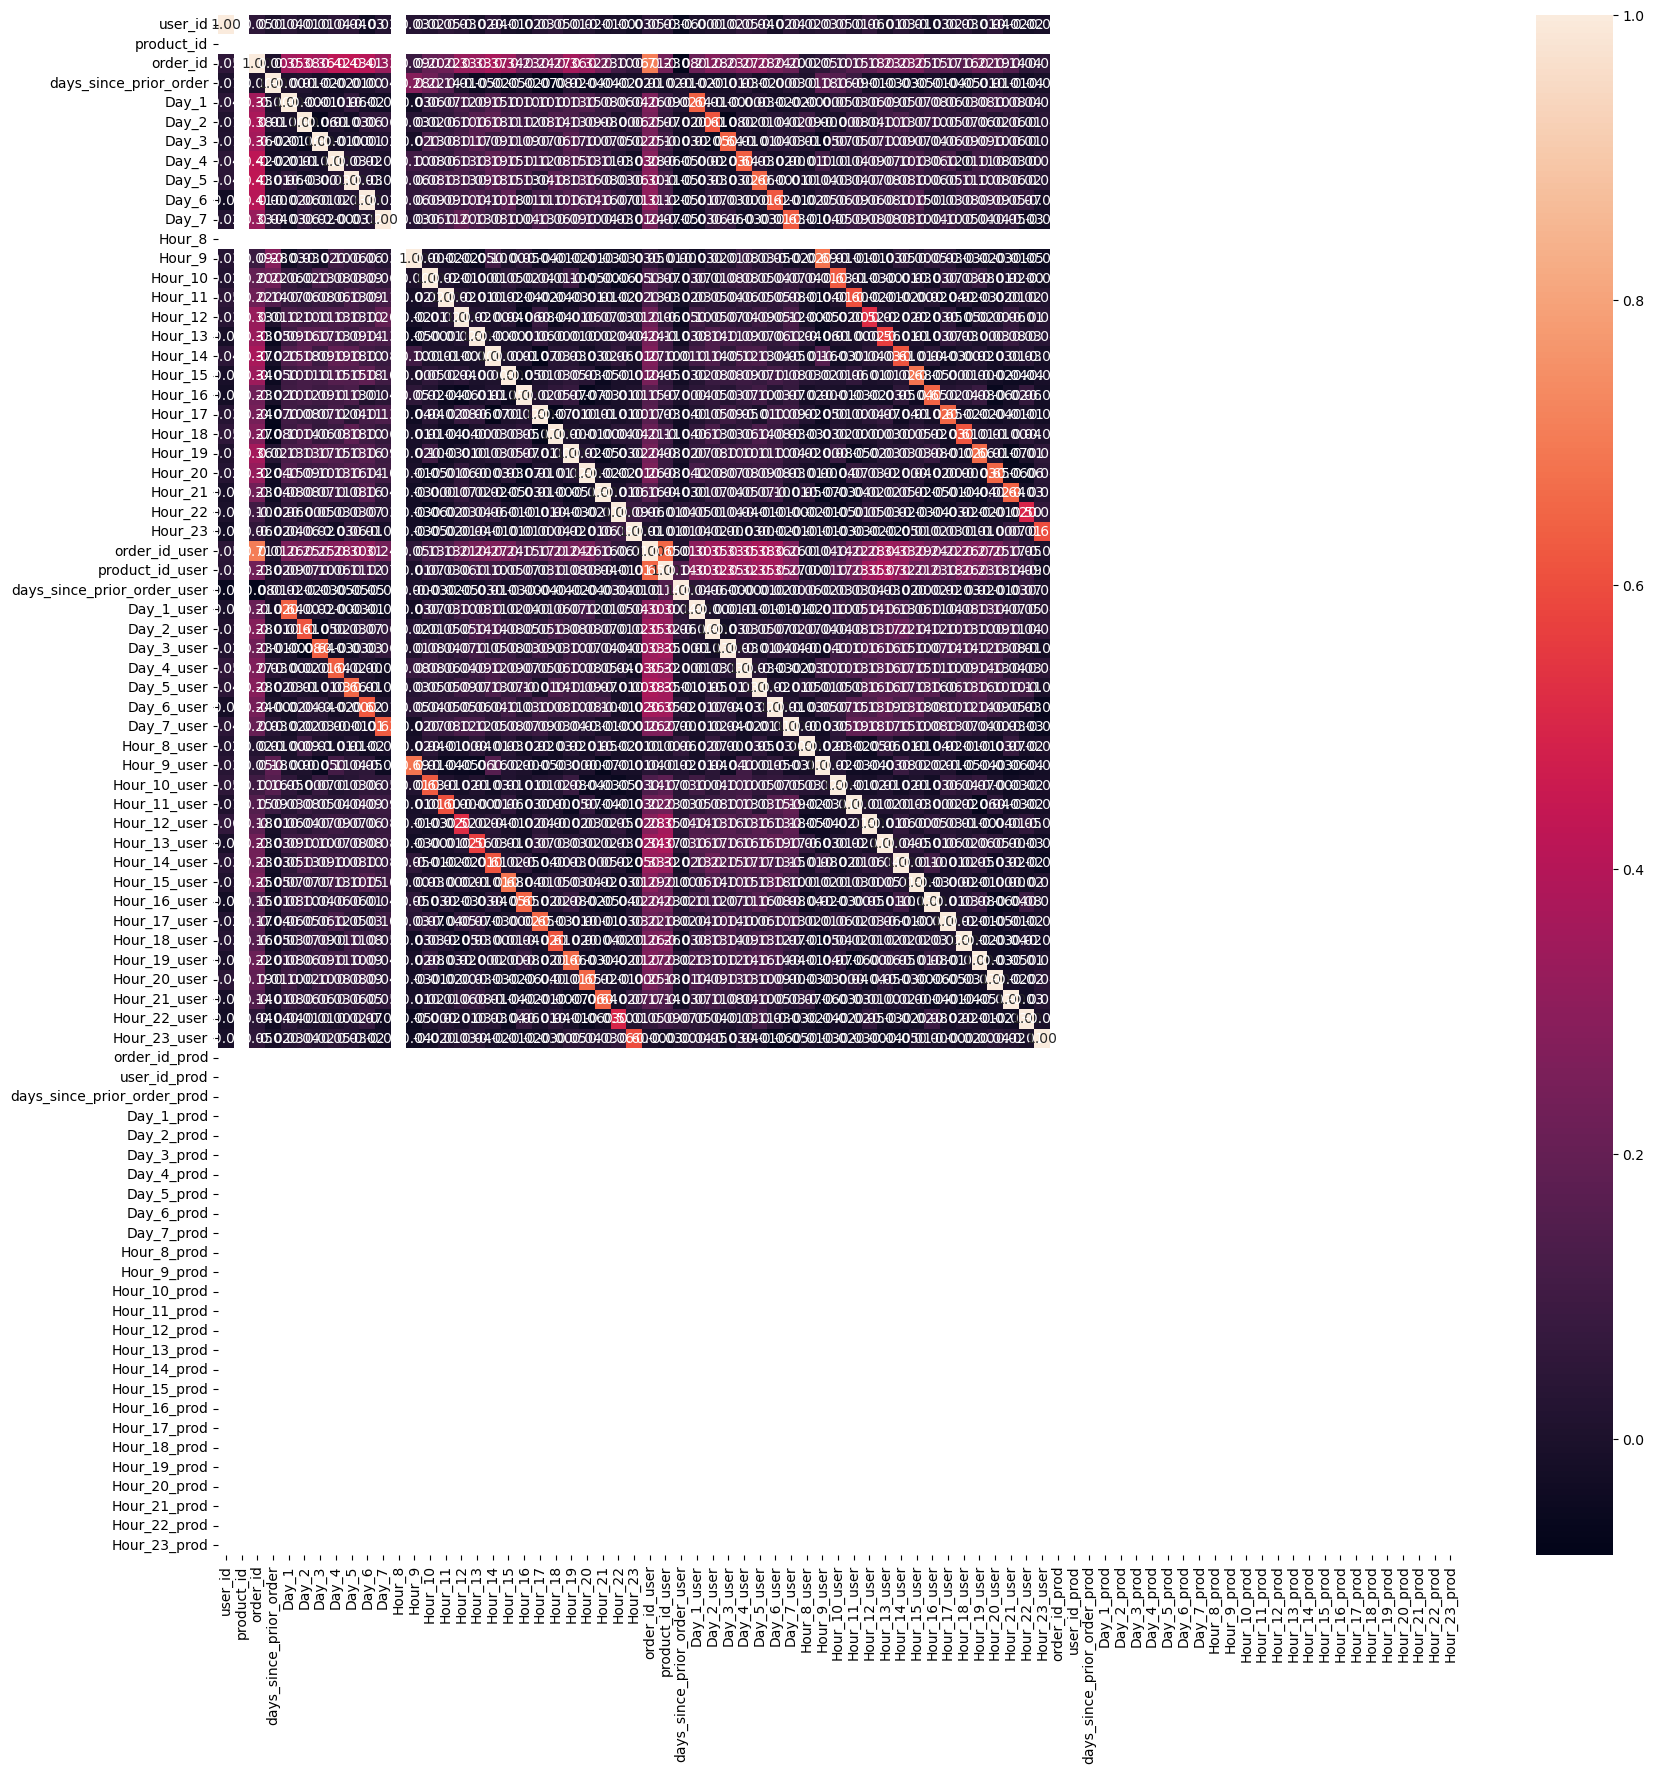

In [45]:
# matriz de correlación de reduced_feature
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = reduce_features_df_dummied.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.savefig('C:\\Users\\Lenovo\\Desktop\\Predicción de ventas\\images\\Matriz de correlación de reduced_feature.png', bbox_inches='tight')
plt.show()


In [46]:
#Splitting Training & Testing Data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(reduce_features_df_dummied)
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)


---

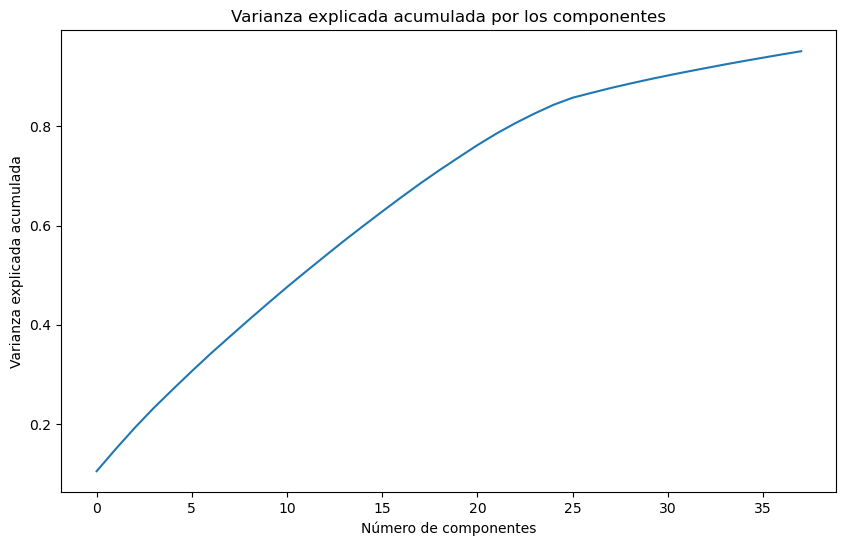

In [47]:
# PCA
# estimar el número de componentes principales
from sklearn.decomposition import PCA
# escoger el número de componentes que explican el 95% de la varianza
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.title('Varianza explicada acumulada por los componentes')
plt.savefig('C:\\Users\\Lenovo\\Desktop\\Predicción de ventas\\images\\Varianza explicada acumulada por los componentes reduced_feature.png', bbox_inches='tight')
plt.show()

Silhouette Score para 2 clusters: 0.0944
Silhouette Score para 3 clusters: 0.0828
Silhouette Score para 4 clusters: 0.0420
Silhouette Score para 5 clusters: 0.0395
Silhouette Score para 6 clusters: 0.0237
Silhouette Score para 7 clusters: 0.0465
Silhouette Score para 8 clusters: 0.0321
Silhouette Score para 9 clusters: 0.0235
Silhouette Score para 10 clusters: 0.0305


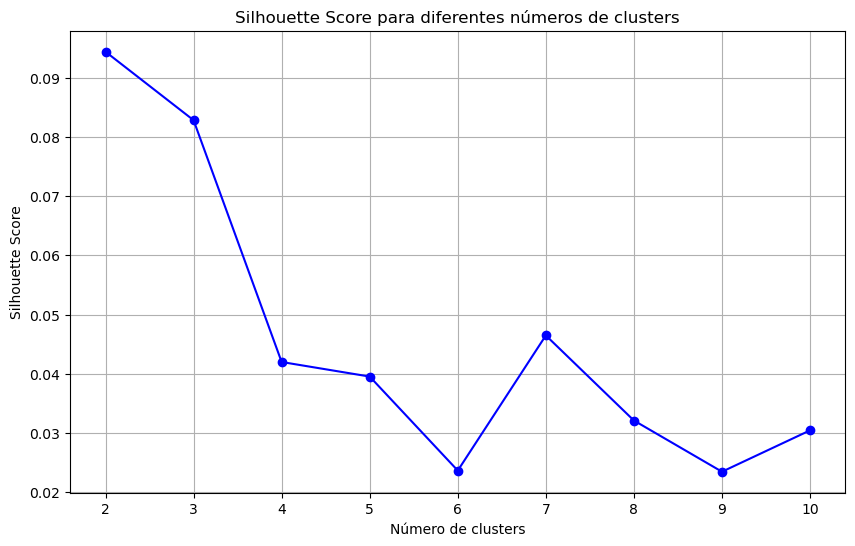

In [48]:
# silhouette_score para determinar el número de clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_pca)
    score = silhouette_score(X_train_pca, kmeans.labels_)
    silhouette_scores.append(score)
    print('Silhouette Score para {} clusters: {:.4f}'.format(k, score))
    
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, 'bo-')
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para diferentes números de clusters')
plt.grid(True)
plt.savefig('C:\\Users\\Lenovo\\Desktop\\Predicción de ventas\\images\\Silhouette Score reduced_feature.png', bbox_inches='tight')
plt.show()

Hay 2 o 3 clusters óptimos para la segmentación de clientes.

Calinski Harabasz Score para 2 clusters: 62.0000
Calinski Harabasz Score para 3 clusters: 44.7504
Calinski Harabasz Score para 4 clusters: 37.5768
Calinski Harabasz Score para 5 clusters: 32.8628
Calinski Harabasz Score para 6 clusters: 31.5808
Calinski Harabasz Score para 7 clusters: 30.6553
Calinski Harabasz Score para 8 clusters: 27.1505
Calinski Harabasz Score para 9 clusters: 26.8147
Calinski Harabasz Score para 10 clusters: 25.8175


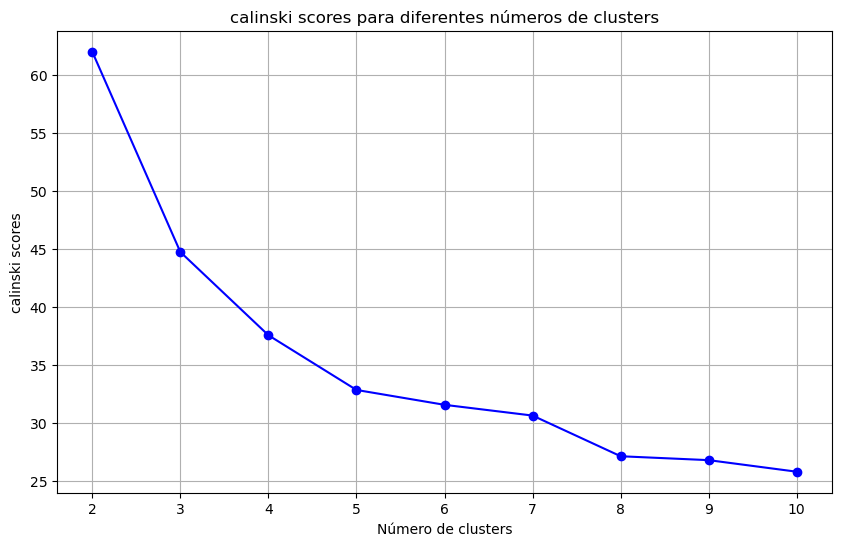

In [49]:
# coeficientes de calinski harabasz 
from sklearn.metrics import calinski_harabasz_score

calinski_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_pca)
    score = calinski_harabasz_score(X_train_pca, kmeans.labels_)
    calinski_scores.append(score)
    print('Calinski Harabasz Score para {} clusters: {:.4f}'.format(k, score))

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), calinski_scores, 'bo-')
plt.xlabel('Número de clusters')
plt.ylabel('calinski scores')
plt.title('calinski scores para diferentes números de clusters')
plt.grid(True)
plt.savefig('C:\\Users\\Lenovo\\Desktop\\Predicción de ventas\\images\\calinski scores reduced_features.png', bbox_inches='tight')
plt.show()

2 o 3 grupos de clientes

Davies Bouldin Score para 2 clusters: 3.4505
Davies Bouldin Score para 3 clusters: 3.1086
Davies Bouldin Score para 4 clusters: 3.7945
Davies Bouldin Score para 5 clusters: 3.5510
Davies Bouldin Score para 6 clusters: 3.3388
Davies Bouldin Score para 7 clusters: 2.9615
Davies Bouldin Score para 8 clusters: 3.1828
Davies Bouldin Score para 9 clusters: 2.9746
Davies Bouldin Score para 10 clusters: 2.8679


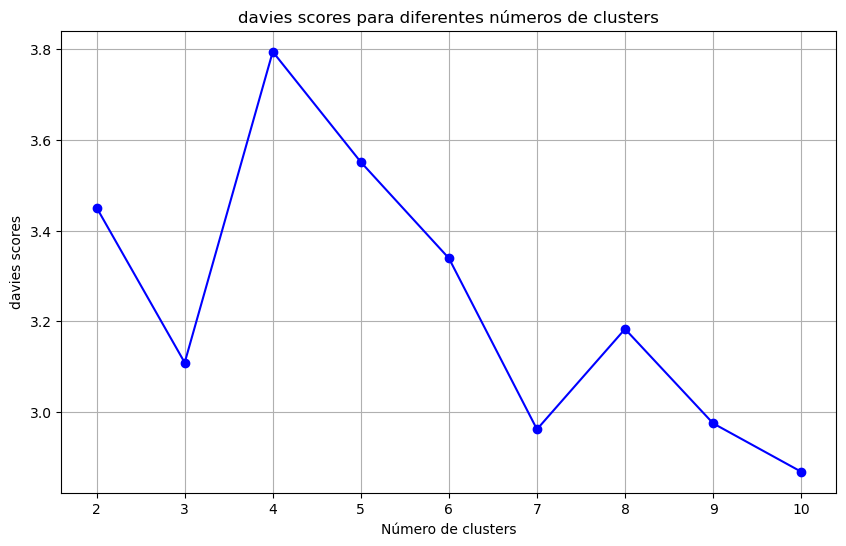

In [50]:
# coeficientes de davies bouldin
from sklearn.metrics import davies_bouldin_score

davies_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_pca)
    score = davies_bouldin_score(X_train_pca, kmeans.labels_)
    davies_scores.append(score)
    print('Davies Bouldin Score para {} clusters: {:.4f}'.format(k, score))

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), davies_scores, 'bo-')
plt.xlabel('Número de clusters')
plt.ylabel('davies scores')
plt.title('davies scores para diferentes números de clusters')
plt.grid(True)
plt.savefig('C:\\Users\\Lenovo\\Desktop\\Predicción de ventas\\images\\davies scores reduced_feature.png', bbox_inches='tight')
plt.show()

10 clusters es el resultado más óptimo según el método de Davies, pero se observa que 3 y 7 clusters también son buenos pues tienen una tendencia a la baja en la gráfica.

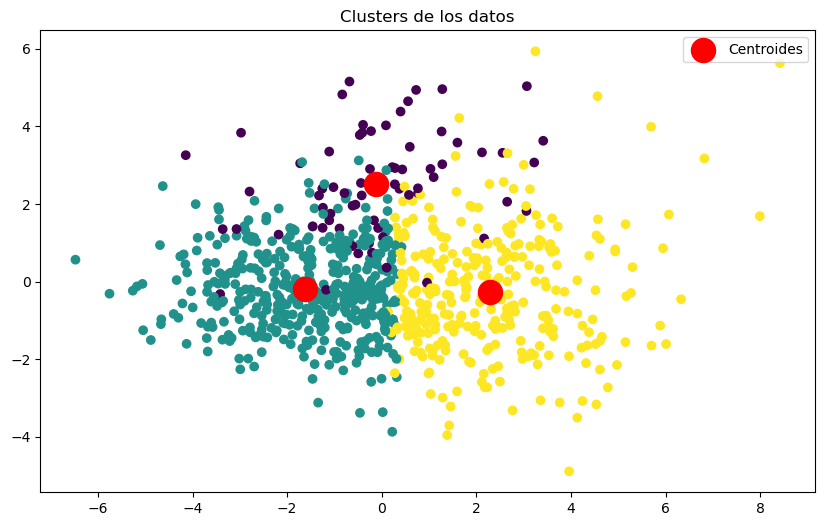

In [51]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
X_train = kmeans.fit_predict(X_train_pca)
X_test = kmeans.predict(X_test_pca)

# gráfico de los clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=X_train, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroides')
plt.title('Clusters de los datos')
plt.legend()
plt.savefig('C:\\Users\\Lenovo\\Desktop\\Predicción de ventas\\images\\Clusters de reduced_feature.png', bbox_inches='tight')
plt.show()



## Clustering y análisis de las variables del dataset preprocesado

In [146]:
# en este análisis se ha utilizado todos los campos del dataset que no sean temporales, pues se han considerado que no aportan información relevante para este ámbito de análisis
# se eliminan las columnas Fecha y Fecha Creación
df2 = df1.copy()
df2 = df2.drop(['Fecha', 'Fecha Creación'], axis=1)
df2.head()

,AÑO,Semana,Dia,Mes,Número,TPV,Tarifa,Tipo Doc.,Familia,Producto,Cantidad,Precio Coste,Precio,Dto. %,Dto. €,Impuesto %,Recargo %,Base,Total,Dto. € Ticket,Dto. % Ticket,Hora,days_since_prior_order,order_id,product_id,user_id
41900,2023,33,2,agosto,T/000003,SERVIDOR,General,Fra. Simp.,Bocadillos,Bocadillo Lomo,1.0,2.35,4.9,0.0,0.0,10.0,1.4,4.45,4.9,0.0,0.0,11,16,8,44,121
41901,2023,33,2,agosto,T/000004,SERVIDOR,General,Fra. Simp.,Bocadillos,Bocadillo Bellota Pata Negra,1.0,4.28,9.9,0.0,0.0,10.0,1.4,9.00,9.9,0.0,0.0,12,16,9,39,466
41902,2023,33,2,agosto,T/000004,SERVIDOR,General,Fra. Simp.,Snacks,Bolsa De Patatas Fritas,1.0,0.42,1.5,0.0,0.0,10.0,1.4,1.36,1.5,0.0,0.0,12,17,9,48,466
41903,2023,33,2,agosto,T/000005,SERVIDOR,General,Fra. Simp.,Bocadillos,Bocadillo Ibérico,2.0,1.65,4.9,0.0,0.0,10.0,1.4,8.91,9.8,0.0,0.0,12,16,10,43,214
41904,2023,33,2,agosto,T/000006,SERVIDOR,General,Fra. Simp.,Bocadillos,Bocadillo Ibérico,1.0,1.65,4.9,0.0,0.0,10.0,1.4,4.45,4.9,0.0,0.0,12,0,11,43,330


In [147]:
# label encoding 
from sklearn.preprocessing import LabelEncoder
# Mes, Número, TPV, Tarifa, Tipo Doc., Familia, Producto
le = LabelEncoder()
df2['Mes'] = le.fit_transform(df2['Mes'])
df2['Tipo Doc.'] = le.fit_transform(df2['Tipo Doc.'])
df2['Familia'] = le.fit_transform(df2['Familia'])
df2['Producto'] = le.fit_transform(df2['Producto'])
df2['Número'] = le.fit_transform(df2['Número'])
df2['TPV'] = le.fit_transform(df2['TPV'])
df2['Tarifa'] = le.fit_transform(df2['Tarifa'])
df2.head()

,AÑO,Semana,Dia,Mes,Número,TPV,Tarifa,Tipo Doc.,Familia,Producto,Cantidad,Precio Coste,Precio,Dto. %,Dto. €,Impuesto %,Recargo %,Base,Total,Dto. € Ticket,Dto. % Ticket,Hora,days_since_prior_order,order_id,product_id,user_id
41900,2023,33,2,1,8,1,0,2,2,15,1.0,2.35,4.9,0.0,0.0,10.0,1.4,4.45,4.9,0.0,0.0,11,16,8,44,121
41901,2023,33,2,1,9,1,0,2,2,10,1.0,4.28,9.9,0.0,0.0,10.0,1.4,9.00,9.9,0.0,0.0,12,16,9,39,466
41902,2023,33,2,1,9,1,0,2,13,19,1.0,0.42,1.5,0.0,0.0,10.0,1.4,1.36,1.5,0.0,0.0,12,17,9,48,466
41903,2023,33,2,1,10,1,0,2,2,14,2.0,1.65,4.9,0.0,0.0,10.0,1.4,8.91,9.8,0.0,0.0,12,16,10,43,214
41904,2023,33,2,1,11,1,0,2,2,14,1.0,1.65,4.9,0.0,0.0,10.0,1.4,4.45,4.9,0.0,0.0,12,0,11,43,330


In [148]:
reduce_preprocessed_df = reduce_mem_usage(df2)

El uso de la memoria del dataframe es 6.02 MB
El uso de la memoria después de la optimizacion es: 1.86 MB
Disminuido en un 69.0%


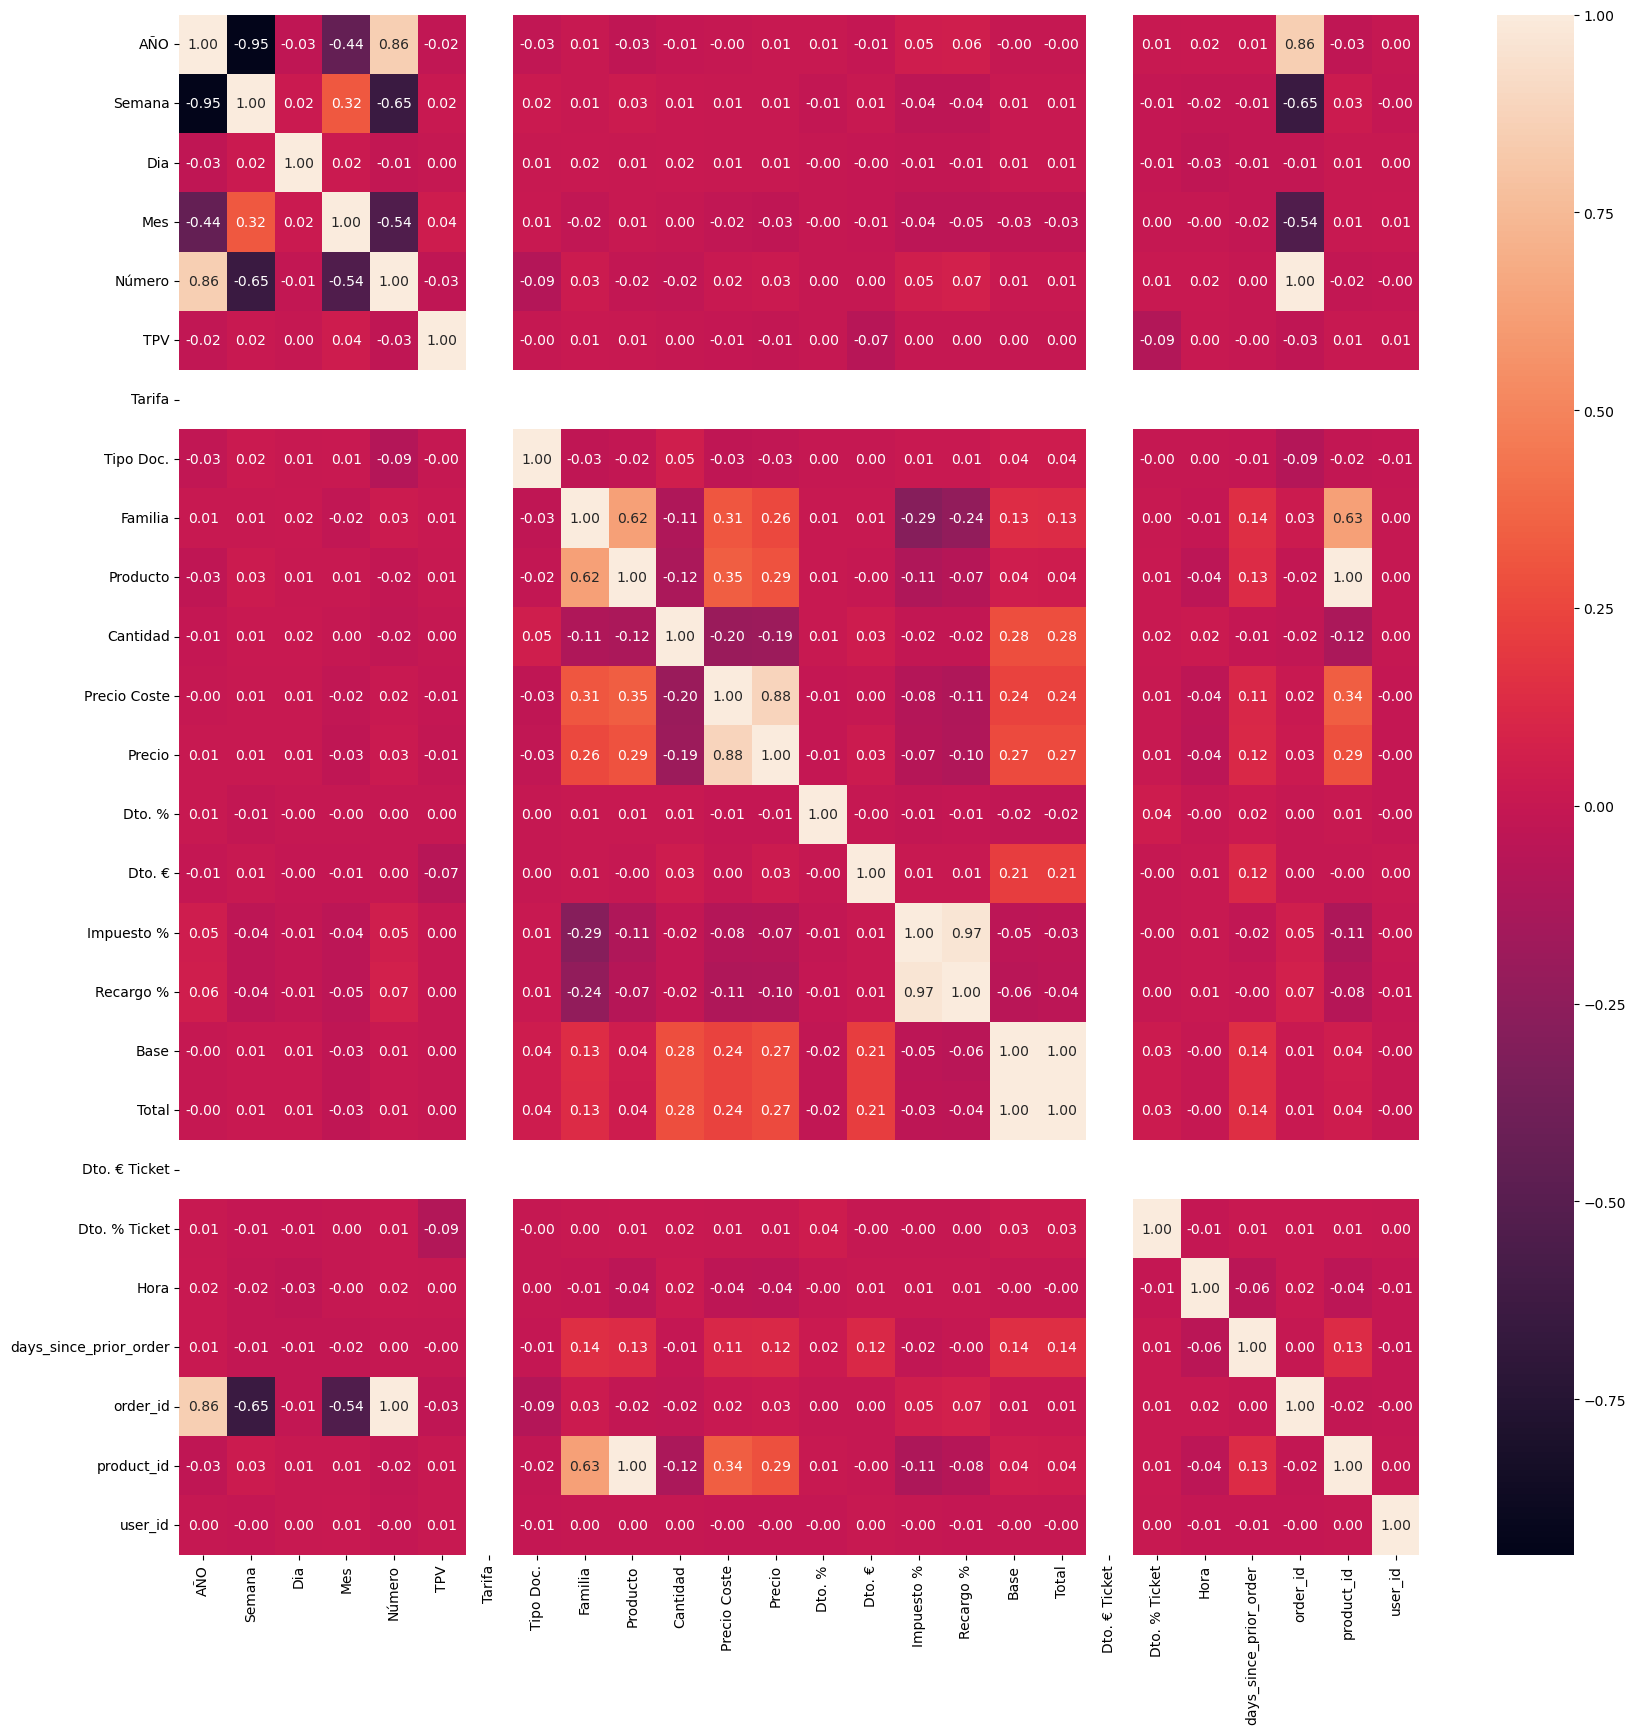

In [149]:
# matriz de correlación de reduced_feature
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = reduce_preprocessed_df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.savefig('C:\\Users\\Lenovo\\Desktop\\Predicción de ventas\\images\\correlación inicial reduce_preprocessed_df.png', bbox_inches='tight')
plt.show()

In [150]:
# mostrar todas las columnas del df
reduce_preprocessed_df.columns

Index(['AÑO', 'Semana', 'Dia', 'Mes', 'Número', 'TPV', 'Tarifa', 'Tipo Doc.',
       'Familia', 'Producto', 'Cantidad', 'Precio Coste', 'Precio', 'Dto. %',
       'Dto. €', 'Impuesto %', 'Recargo %', 'Base', 'Total', 'Dto. € Ticket',
       'Dto. % Ticket', 'Hora', 'days_since_prior_order', 'order_id',
       'product_id', 'user_id'],
      dtype='object')

In [151]:
#Splitting Training & Testing Data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(reduce_preprocessed_df)
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)


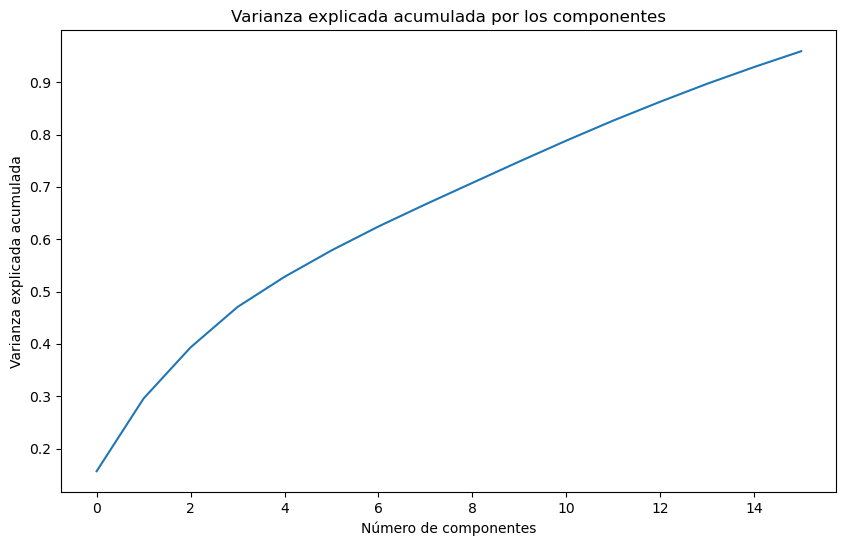

In [152]:
# PCA
# estimar el número de componentes principales
from sklearn.decomposition import PCA
# escoger el número de componentes que explican el 95% de la varianza
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.title('Varianza explicada acumulada por los componentes')
plt.savefig('C:\\Users\\Lenovo\\Desktop\\Predicción de ventas\\images\\PCA dataset preprocesado.png', bbox_inches='tight')
plt.show()

Silhouette Score para 2 clusters: 0.2408
Silhouette Score para 3 clusters: 0.2375
Silhouette Score para 4 clusters: 0.2406
Silhouette Score para 5 clusters: 0.2524
Silhouette Score para 6 clusters: 0.2534
Silhouette Score para 7 clusters: 0.2660
Silhouette Score para 8 clusters: 0.2671
Silhouette Score para 9 clusters: 0.2489


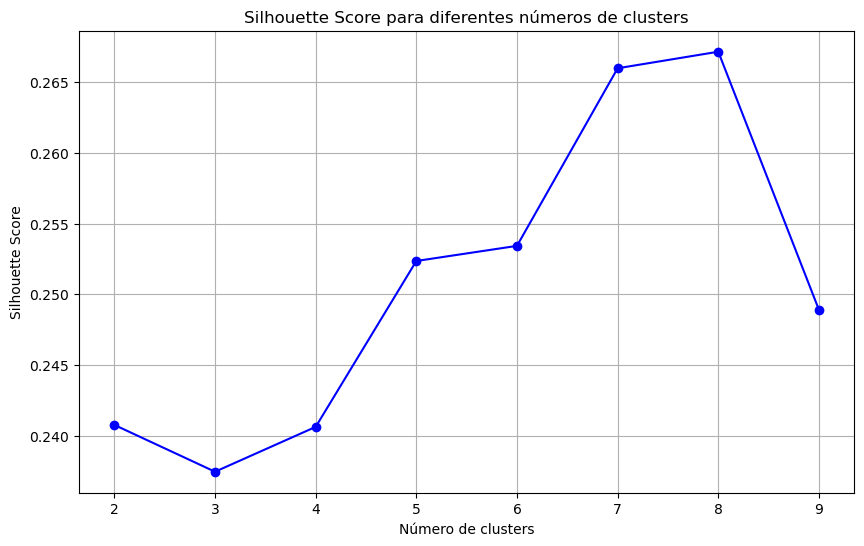

In [153]:
# silhouette_score para determinar el número de clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_pca)
    score = silhouette_score(X_train_pca, kmeans.labels_)
    silhouette_scores.append(score)
    print('Silhouette Score para {} clusters: {:.4f}'.format(k, score))
    
plt.figure(figsize=(10, 6))
plt.plot(range(2, 10), silhouette_scores, 'bo-')
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para diferentes números de clusters')
plt.grid(True)
plt.savefig('C:\\Users\\Lenovo\\Desktop\\Predicción de ventas\\images\\Silhouette Score dataset preprocesado.png', bbox_inches='tight')
plt.show()

7 y 8 clusters según el método del codo

Calinski Harabasz Score para 2 clusters: 5406.1870
Calinski Harabasz Score para 3 clusters: 4557.9289
Calinski Harabasz Score para 4 clusters: 4164.4903
Calinski Harabasz Score para 5 clusters: 3804.3295
Calinski Harabasz Score para 6 clusters: 3718.6141
Calinski Harabasz Score para 7 clusters: 3452.1606
Calinski Harabasz Score para 8 clusters: 3822.9972
Calinski Harabasz Score para 9 clusters: 3697.4239


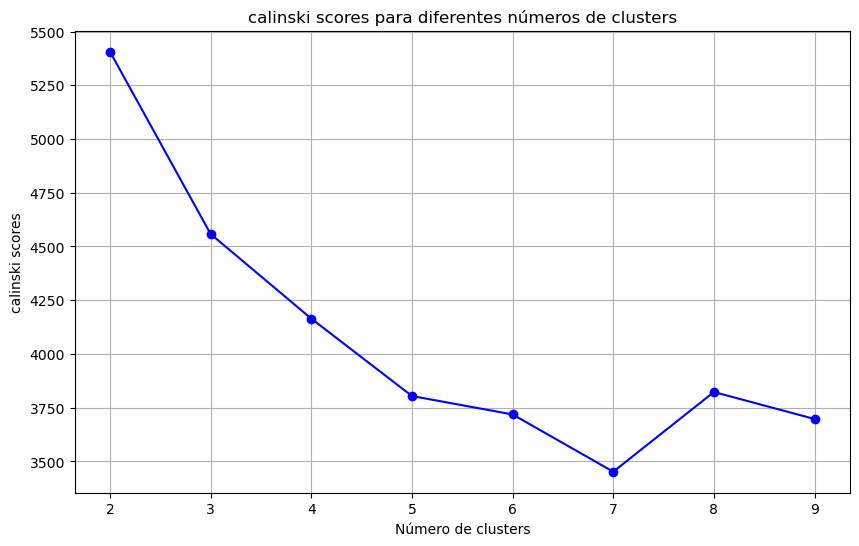

In [154]:
# coeficientes de calinski harabasz 
from sklearn.metrics import calinski_harabasz_score

calinski_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_pca)
    score = calinski_harabasz_score(X_train_pca, kmeans.labels_)
    calinski_scores.append(score)
    print('Calinski Harabasz Score para {} clusters: {:.4f}'.format(k, score))

plt.figure(figsize=(10, 6))
plt.plot(range(2, 10), calinski_scores, 'bo-')
plt.xlabel('Número de clusters')
plt.ylabel('calinski scores')
plt.title('calinski scores para diferentes números de clusters')
plt.grid(True)
plt.savefig('C:\\Users\\Lenovo\\Desktop\\Predicción de ventas\\images\\calinski scores dataset preprocesado.png', bbox_inches='tight')
plt.show()

7 y 9 clusters según el método de calinski_harabasz

Davies Bouldin Score para 2 clusters: 1.7807
Davies Bouldin Score para 3 clusters: 1.6597
Davies Bouldin Score para 4 clusters: 1.3480
Davies Bouldin Score para 5 clusters: 1.3824
Davies Bouldin Score para 6 clusters: 1.1498
Davies Bouldin Score para 7 clusters: 1.1803
Davies Bouldin Score para 8 clusters: 1.1354
Davies Bouldin Score para 9 clusters: 1.2390


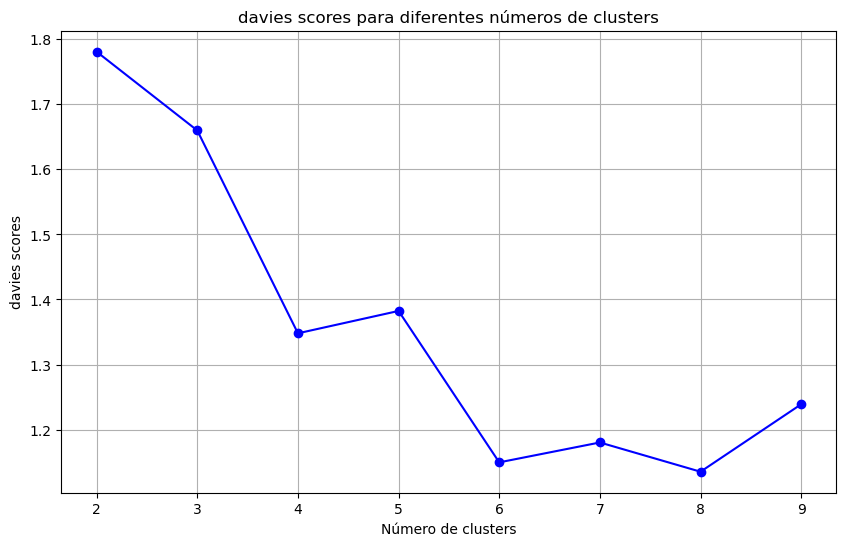

In [155]:
# coeficientes de davies bouldin
from sklearn.metrics import davies_bouldin_score

davies_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_pca)
    score = davies_bouldin_score(X_train_pca, kmeans.labels_)
    davies_scores.append(score)
    print('Davies Bouldin Score para {} clusters: {:.4f}'.format(k, score))

plt.figure(figsize=(10, 6))
plt.plot(range(2, 10), davies_scores, 'bo-')
plt.xlabel('Número de clusters')
plt.ylabel('davies scores')
plt.title('davies scores para diferentes números de clusters')
plt.grid(True)
plt.savefig('C:\\Users\\Lenovo\\Desktop\\Predicción de ventas\\images\\davies scores dataset preprocesado.png', bbox_inches='tight')
plt.show()

6 y 8 según el método de Davies. Se prueban con 7 o 8 finalmente.

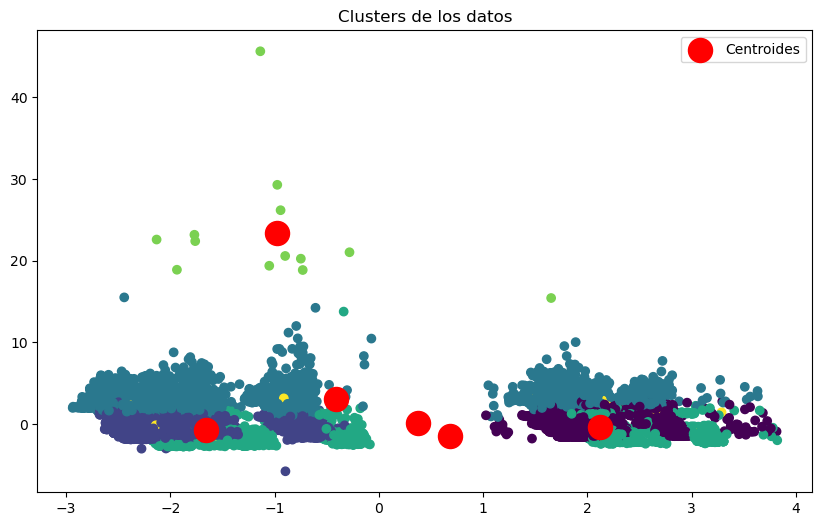

In [160]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, random_state=42)
X_train = kmeans.fit_predict(X_train_pca)
X_test = kmeans.predict(X_test_pca)

# gráfico de los clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=X_train, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroides')
plt.title('Clusters de los datos')
plt.legend()
plt.savefig('C:\\Users\\Lenovo\\Desktop\\Predicción de ventas\\images\\Clusters dataset preprocesado.png', bbox_inches='tight')
plt.show()


In [161]:
# guardar el conjunto de datos en un archivo csv
reduce_preprocessed_df.to_csv('C:\\Users\\Lenovo\\Desktop\\Predicción de ventas\\processedData\\reduce_preprocessed_df.csv', index=False)

---

## <center> 5. Modelización predictiva

In [62]:
# df1 groupby por Familia y Fecha
df_familia_fecha = df.groupby(['Familia', 'Fecha']).agg({'Número':'count', 'Cantidad':'sum'}).reset_index()
df_familia_fecha.columns# para cada Familia se crea un gráfico de líneas con Fecha y Cantidad
df_familia_fecha["Familia_log"] = df_familia_fecha["Cantidad"].apply(np.log)
df_familia_fecha["Familia_log_diff"] = df_familia_fecha["Familia_log"].diff()

In [64]:
# sustituir valores infinitos
df_familia_fecha.replace([np.inf, -np.inf], np.nan, inplace=True)

In [65]:
from prophet import Prophet

In [66]:
df_familia_fecha = df_familia_fecha[df_familia_fecha['Familia'] == 'Merma']


In [68]:
df_familia_fecha.drop(['Familia', 'Número', 'Número', 'Familia_log', 'Familia_log_diff'], axis=1, inplace=True)

In [69]:
# castear Fecha a datetime y Cantidad a int
df_familia_fecha['Fecha'] = pd.to_datetime(df_familia_fecha['Fecha'])
df_familia_fecha['Cantidad'] = df_familia_fecha['Cantidad'].astype(int)


In [70]:
df_familia_fecha.columns = ['DS', 'Y']
df_familia_fecha.head()

,DS,Y
3394,2024-04-29,22
3395,2024-04-30,23
3396,2024-05-01,26
3397,2024-05-02,12
3398,2024-05-04,10


In [74]:
!pip install --upgrade pystan

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
INFO: pip is looking at multiple versions of pystan to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of pystan to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
     --------------------------------------- 16.2/16.2 MB 27.3 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [17 lines of output]
      Traceback (most recent call last):
        File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
          main()
        File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
        File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 118, in get_requires_for_build_wheel
          return hook(config_settings)
        File "C:\Users\Lenovo\AppData\Local\Temp\pip-build-env-aiaaddxu\overlay\Lib\site-packages\setuptools\build_meta.py", line 325, in get_requires_for_build_wheel
       

In [75]:
m = Prophet()
m.fit(df_familia_fecha)

AttributeError: 'Prophet' object has no attribute 'stan_backend'

In [190]:
# cambiar el índice del dataset
df_familia_fecha.set_index('Fecha', inplace=True)


In [193]:
df_familia_fecha['Familia'].unique()

array(['Aceites', 'Bebidas', 'Bocadillos', 'Bolsas',
       'CC - Corte a cuchillo', 'Embutidos en tercios', 'Hornazos',
       'MQ - Corte tradicional', 'Merma', 'PE - Patas enteras',
       'Panaderia', 'Quesos', 'Servicios', 'Snacks', 'Sobres al vacio',
       'Varios', 'Vinos'], dtype=object)

In [194]:
# crear subdatasets para cada Familia: 'Aceites', 'Bebidas', 'Bocadillos', 'Bolsas', 'CC - Corte a cuchillo', 'Embutidos en tercios', 'Hornazos', 'MQ - Corte tradicional', 'Merma', 'PE - Patas enteras','Panaderia', 'Quesos', 'Servicios', 'Snacks', 'Sobres al vacio', 'Varios', 'Vinos'
df_familia_fecha_bolsas = df_familia_fecha[df_familia_fecha['Familia'] == 'Bolsas']
df_familia_fecha_sobres = df_familia_fecha[df_familia_fecha['Familia'] == 'Sobres al vacio']
df_familia_fecha_servicios = df_familia_fecha[df_familia_fecha['Familia'] == 'Servicios']
df_familia_fecha_panaderia = df_familia_fecha[df_familia_fecha['Familia'] == 'Panaderia']
df_familia_fecha_vinos = df_familia_fecha[df_familia_fecha['Familia'] == 'Vinos']
df_familia_fecha_bebidas = df_familia_fecha[df_familia_fecha['Familia'] == 'Bebidas']
df_familia_fecha_bocadillos = df_familia_fecha[df_familia_fecha['Familia'] == 'Bocadillos']
df_familia_fecha_cc = df_familia_fecha[df_familia_fecha['Familia'] == 'CC - Corte a cuchillo']
df_familia_fecha_embutidos = df_familia_fecha[df_familia_fecha['Familia'] == 'Embutidos en tercios']
df_familia_fecha_hornazos = df_familia_fecha[df_familia_fecha['Familia'] == 'Hornazos']
df_familia_fecha_mq = df_familia_fecha[df_familia_fecha['Familia'] == 'MQ - Corte tradicional']
df_familia_fecha_merma = df_familia_fecha[df_familia_fecha['Familia'] == 'Merma']
df_familia_fecha_pe = df_familia_fecha[df_familia_fecha['Familia'] == 'PE - Patas enteras']
df_familia_fecha_q = df_familia_fecha[df_familia_fecha['Familia'] == 'Quesos']
df_familia_fecha_snacks = df_familia_fecha[df_familia_fecha['Familia'] == 'Snacks']
df_familia_fecha_varios = df_familia_fecha[df_familia_fecha['Familia'] == 'Varios']


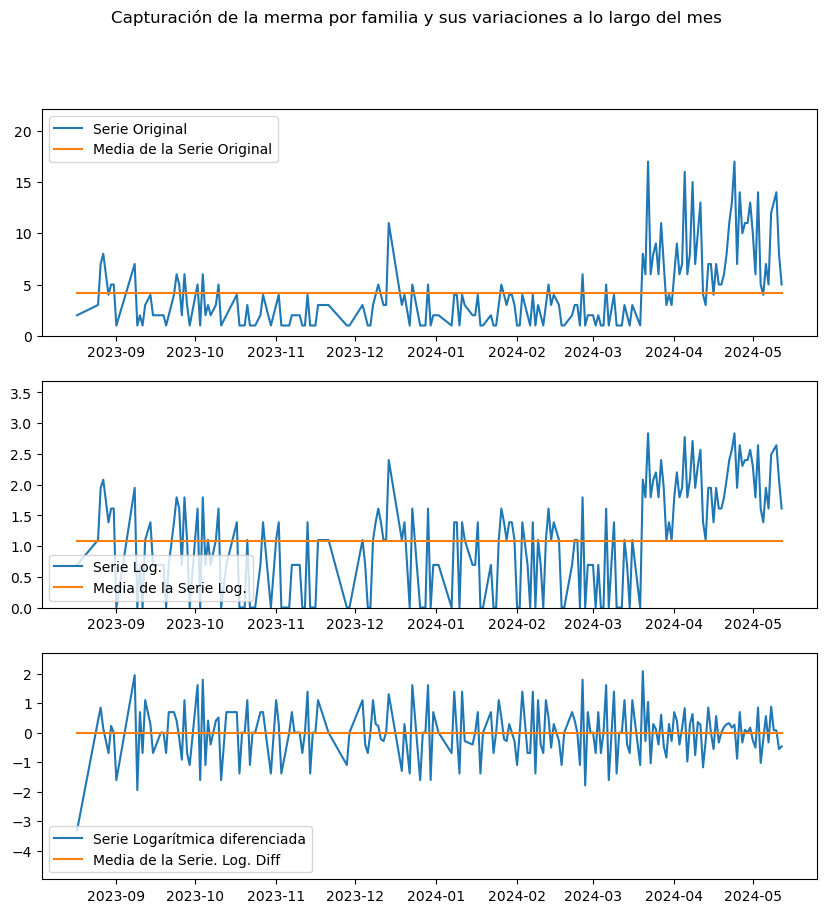

In [206]:
# para cada Familia se crea un gráfico de líneas con Fecha y Cantidad
# separar x y la y para el gráfico
x = df_familia_fecha_bolsas.index

y = df_familia_fecha_bolsas["Cantidad"]
y_media = [np.mean(y) for _ in y]

y_log = df_familia_fecha_bolsas["Familia_log"]
y_log_media = [np.mean(y_log) for _ in y_log]

y_log_diff = df_familia_fecha_bolsas["Familia_log_diff"]
y_log_diff_mean = [np.mean(y_log_diff) for _ in y_log_diff]

# visualización de los datos anteriores a los largo de los años
fig = plt.figure(figsize = (10, 10))
ax1, ax2, ax3 = fig.subplots(3, 1)

# la serie original parece ser no estacionaria
# si nos fijamos en su comportamiento, vemos muchos picos y que la media de diferentes
# tramos de la serie es diferente.
# además la covarianza entre diferentes tramos también parece distinta.
ax1.plot(x, y, label = "Serie Original")
ax1.plot(x, y_media, label = "Media de la Serie Original")
ax1.set_ylim(0, np.max(y)*1.3)
ax1.legend(loc = "upper left")

# Si transformamos la serie utilizando el logaritmo neperiano (ln)
# tenemos una serie que YA es estacionaria en media y que oscila entorno
# a 7.
ax2.plot(x, y_log, label = "Serie Log.")
ax2.plot(x, y_log_media, label = "Media de la Serie Log.")
ax2.set_ylim(0, np.max(y_log)*1.3)
ax2.legend(loc = "lower left")

# Si aplicamos una diferenciación a al serie logarítmica, seguimos teniendo
# una serie estacionaria, pero esta vez, la media de la serie oscila entorno al cero.
# La diferenciación de una serie estacionaria SIEMPRE da lugar a otra serie estacionaria.
# Por este motivo, no haría falta hacer la diferencia y con la serie transformada (logarítmica)
# es suficiente.

ax3.plot(x, y_log_diff, label = "Serie Logarítmica diferenciada")
ax3.plot(x, y_log_diff_mean, label = "Media de la Serie. Log. Diff")
ax3.set_ylim(np.min(y_log_diff)*1.5, np.max(y_log_diff)*1.3)
ax3.legend(loc = "lower left")

fig.suptitle("Capturación de la merma por familia y sus variaciones a lo largo del mes");


In [207]:
serie_a_predecir = y_log
y_index = serie_a_predecir.index
date_train = int(len(y_index)*0.9)
y_train = serie_a_predecir[y_index[:date_train]]
y_test = serie_a_predecir[y_index[date_train:len(y_index)]]
y_train.tail()
y_test.head()

Fecha
2024-04-22    2.397895
2024-04-23    2.564949
2024-04-24    2.833213
2024-04-25    1.945910
2024-04-26    2.639057
Name: Familia_log, dtype: float64

In [208]:
import itertools

# Para hacer el gridsearch, vamos a calcular los posibles valores que vamos a pasarle al modelo.
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))

# Vamos a utilizar el modelo SARIMAX, porque en su implementaciòn en Python existen herramientas adicionales
# que nos facilitan el análisis y que no están disponibles en la implementación de ARIMA.

# Ahora bien, SARIMAX es un modelo ARIMA pero con un componente estacional (la leta S de Seasonal) y también
# un componente exógeno (X de eXogenous regressors)
# Por tanto un modelo SARIMAX de (1, 1, 1) x (0, 0, 0, 0)
# Es un modelo ARIMA (1, 1, 1)

# En caso de querer probar un modelo SARIMAX completo, ejecutar la siguiente línea de itertools.
# seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

# Los dejamos a cero para sólo analizar un modelo ARIMA.
seasonal_pdq = [(0, 0, 0, 0)]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[3], seasonal_pdq[0]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 0, 0)
SARIMAX: (0, 1, 0) x (0, 0, 0, 0)


In [209]:
import time
import statsmodels.api as sm

st = time.time()

best_score = 0
best_params = None
best_seasonal_params = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            
            mod = sm.tsa.statespace.SARIMAX(y_train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity = False,
                                            enforce_invertibility = False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
            # guardamos el mejor resultado
            if best_score == 0:
                best_score = results.aic
                best_params = param
                best_seasonal_params = param_seasonal
                
            elif abs(results.aic) < abs(best_score):
                best_score = results.aic
                best_params = param
                best_seasonal_params = param_seasonal
            
        # alguna combinación de parámetros en SARIMAX, no son válidos
        # y los vamos a cazar con un except
        except:
            continue

et = time.time()

print("La búsqueda de parámetros no ha llevado {} minutos!".format((et - st)/60))

ARIMA(0, 0, 0)x(0, 0, 0, 0)12 - AIC:589.0868935261685
ARIMA(0, 0, 1)x(0, 0, 0, 0)12 - AIC:517.6088026570903
ARIMA(0, 0, 2)x(0, 0, 0, 0)12 - AIC:481.0067579758296
ARIMA(0, 1, 0)x(0, 0, 0, 0)12 - AIC:459.28702636976345
ARIMA(0, 1, 1)x(0, 0, 0, 0)12 - AIC:364.0923177552762
ARIMA(0, 1, 2)x(0, 0, 0, 0)12 - AIC:365.42710260647766
ARIMA(0, 2, 0)x(0, 0, 0, 0)12 - AIC:657.6130398434764
ARIMA(0, 2, 1)x(0, 0, 0, 0)12 - AIC:462.153931292768
ARIMA(0, 2, 2)x(0, 0, 0, 0)12 - AIC:369.5847193252099
ARIMA(1, 0, 0)x(0, 0, 0, 0)12 - AIC:440.3356946555276
ARIMA(1, 0, 1)x(0, 0, 0, 0)12 - AIC:368.37807487954933
ARIMA(1, 0, 2)x(0, 0, 0, 0)12 - AIC:368.31321045352155
ARIMA(1, 1, 0)x(0, 0, 0, 0)12 - AIC:402.5992460598029
ARIMA(1, 1, 1)x(0, 0, 0, 0)12 - AIC:365.650682273134
ARIMA(1, 1, 2)x(0, 0, 0, 0)12 - AIC:364.5784420253458
ARIMA(1, 2, 0)x(0, 0, 0, 0)12 - AIC:546.1364483563684
ARIMA(1, 2, 1)x(0, 0, 0, 0)12 - AIC:406.42059928837887
ARIMA(1, 2, 2)x(0, 0, 0, 0)12 - AIC:370.8458250643992
ARIMA(2, 0, 0)x(0, 0, 0, 

In [210]:
print("El mejor modelo es {}, \nCon un AIC de {}".format(best_params, best_score))

El mejor modelo es (0, 1, 1), 
Con un AIC de 364.0923177552762


In [211]:
# Entrenamos el modelo con los mejores parametros.

mod = sm.tsa.statespace.SARIMAX(y_train,
                                order = best_params,
                                seasonal_order = param_seasonal,
                                enforce_stationarity = False,
                                enforce_invertibility = False)

results = mod.fit()

In [212]:
results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8048      0.046    -17.543      0.000      -0.895      -0.715
sigma2         0.4364      0.056      7.822      0.000       0.327       0.546


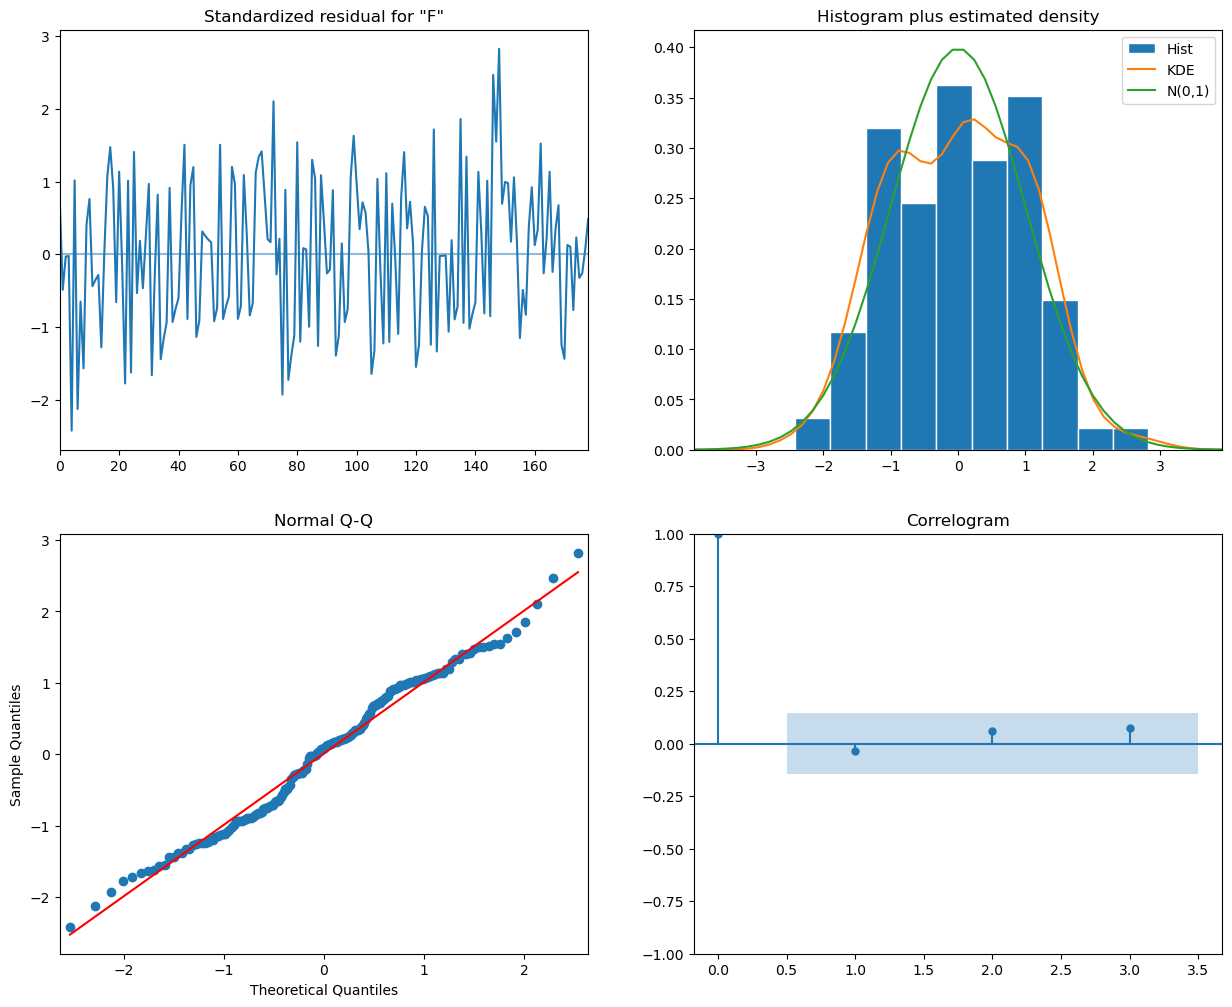

In [213]:
results.plot_diagnostics(figsize = (15, 12), lags = 3);


In [214]:
# Para hacer una predicción es suficiente con especificar el número de steps/pasos futuros a estimar.
pred_uc = results.get_forecast(steps = len(y_test))
# Calcula el intervalo de confianza de la predicción.
pred_ci = pred_uc.conf_int()


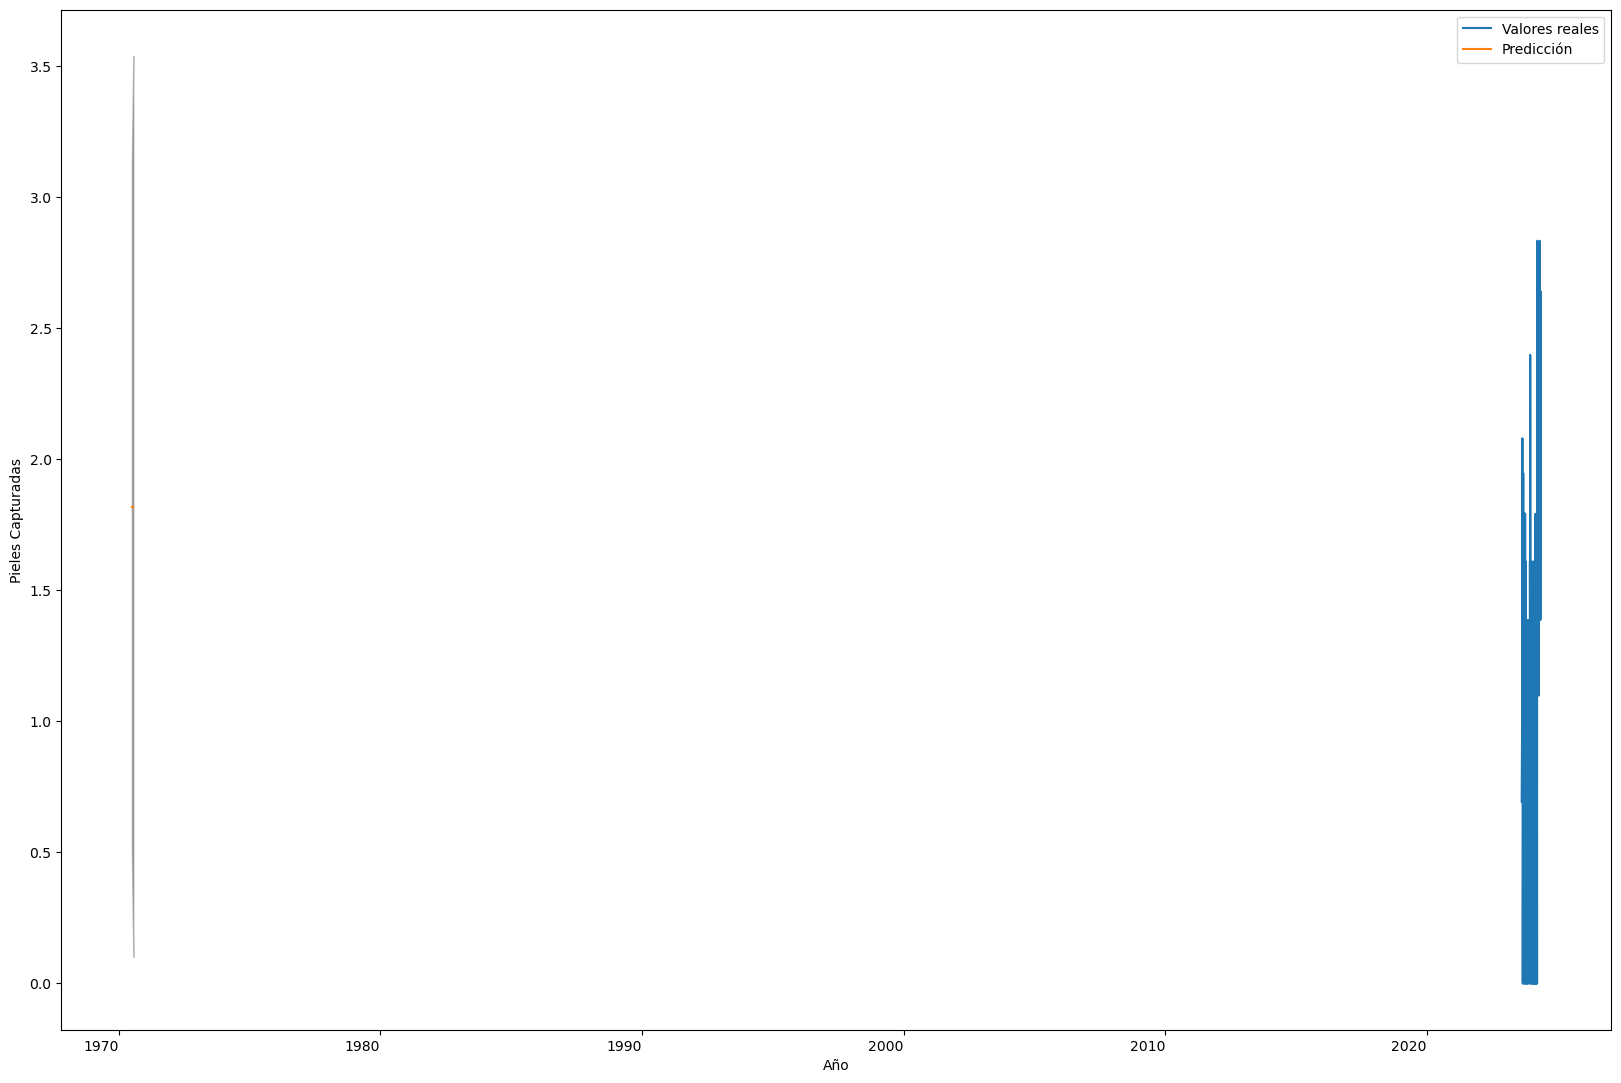

In [215]:
ax = serie_a_predecir.plot(label = 'Valores reales', figsize = (20, 15))
pred_uc.predicted_mean.plot(ax = ax, label = 'Predicción')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color = 'k', alpha = .25)
ax.set_xlabel('Año')
ax.set_ylabel('Pieles Capturadas')
plt.legend()
plt.show()

In [3]:

reduce_features_df_dummied_prod

NameError: name 'reduce_features_df_dummied_prod' is not defined

## <center> 6. Project Outcomes & Conclusions

### Here are some of the key outcomes of the project:
- The Dataset was quiet large with combined data totally around 1.3M. 
- There were also few outliers & no duplicates present in the datset, which had to be dropped.
- Visualising the distribution of data & their relationships, helped us to get some insights on the relationship between the featureset.
- Further filtering was done with threshold for the number of user id's & product id's.
- Finally Nearest Neighbours Algorithm was employed to get the similar Groceries Recommendations based on the Cosine Similarity.

In [ ]:
#<<<--------------------------------------------THE END-------------------------------------------->>>